In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import joblib, json, sys, os
from IPython.display import Image, display_png

sys.path.append("../script/")
from MergeBrain import WholeBrainCells
import matplotlib.pyplot as plt
import pandas as pd

import sys, os, os.path, re, csv, math
import linecache
import numpy as  np
import pandas as pd
from matplotlib import pyplot as plt
from statistics import mean,stdev
import seaborn as sns

import csv
import pprint
import ants
import tifffile
from multiprocessing import Pool
import datetime
from itertools import product

import numpy as np
import tifffile
import os
import pickle
import joblib
import pandas as pd
from matplotlib import pyplot as plt
import concurrent.futures
import gc
import json

import datetime
import matplotlib
matplotlib.rcParams['pdf.use14corefonts'] = True
plt.rcParams['font.size'] = 20

In [3]:
data_Atlas = pd.read_csv(filepath_or_buffer="/export3/Imaging/atlas_for_fig/count_all_rgb.csv", encoding="ms932", sep=",")
# インプットの項目数（行数 * カラム数）を返却します。
data_atlas=np.array(data_Atlas.values.tolist())
#print(data_Atlas.size)
# 指定したカラムだけ抽出したDataFrameオブジェクトを返却します。
data_GO = pd.read_csv(filepath_or_buffer="/export3/Imaging/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")
# 指定したカラムだけ抽出したDataFrameオブジェクトを返却します。
data_GO

,id,graph_order,R,G,B
0,997,0,255,255,255
1,68,7,38,143,69
2,667,8,38,143,69
3,52192,9,38,143,69
4,52196,10,38,143,69
...,...,...,...,...,...
666,129,1299,170,170,170
667,140,1300,170,170,170
668,145,1301,170,170,170
669,153,1302,170,170,170


In [4]:
# 下記は一部のidだけが対象
dir= "/export3/Imaging/cubic-atlas_v1-1/cubic-atlas/"
dir_ana=dir+"summary_CUBIC-Atlas-1-1.csv"


data_id = pd.read_csv(filepath_or_buffer=dir_ana, encoding="ms932", sep=",")
data_id

,id,acronym,node_name,graph_order,rgb_triplet,cell_count,volume(mm3),density(cells/mm3)
0,997,root,root,0,"[255, 255, 255]",78620375,506.05289,155359.99590
1,8,grey,Basic cell groups and regions,1,"[191, 218, 227]",70525778,449.60086,156863.08540
2,567,CH,Cerebrum,2,"[176, 240, 255]",39291452,275.87673,142423.94190
3,688,CTX,Cerebral cortex,3,"[176, 255, 184]",31750427,221.54964,143310.66800
4,695,CTXpl,Cortical plate,4,"[112, 255, 112]",30687805,212.64380,144315.54300
...,...,...,...,...,...,...,...,...
834,129,V3,third ventricle,1299,"[170, 170, 170]",144614,0.90005,160673.85380
835,140,AQ,cerebral aqueduct,1300,"[170, 170, 170]",26972,0.40620,66400.27696
836,145,V4,fourth ventricle,1301,"[170, 170, 170]",118275,0.96495,122570.72070
837,153,V4r,lateral recess,1302,"[170, 170, 170]",71934,0.46333,155254.98260


In [5]:
dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori)

In [68]:
len(grid_points_ori)

92873701

In [69]:
len(grid_points_ori[grid_points_ori["atlasID"]>0])

92873701

In [70]:
(51614573*100)/92873701

55.57501471810626

In [6]:
grid_points_ori_Neuron = grid_points_ori [(grid_points_ori['NeuN_positive'] > 0) & (grid_points_ori['atlasID'] > 0)].copy()
len(grid_points_ori_Neuron )

51614573

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ast

# atlasIDに対応するrgb_tripletを辞書に変換する
color_dict = {row['id']: [int(x) for x in ast.literal_eval(row['rgb_triplet'])] for _, row in data_id.iterrows()}

# atlasIDに対応する色を一括で取得する
def get_colors(atlas_ids):
    unique_ids = np.unique(atlas_ids)
    color_map = {id_: [c/255 for c in color_dict.get(id_, [0, 0, 0])] for id_ in unique_ids}
    return np.array([color_map[id_] for id_ in atlas_ids])

colors = get_colors(grid_points_ori_Neuron['atlasID'].values)

In [8]:
dt_SCA3 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),('x_invAffined', 'f4'), ('y_invAffined', 'f4'), ('z_invAffined', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori_Affined = np.fromfile('/export3/Imaging/CUBIC_Cloud_data/SCA_all_cells_Affined_coordinates_ver2_2.bin', dtype=dt_SCA3)

grid_points_ori_Affined   = pd.DataFrame(grid_points_ori_Affined )

In [9]:
grid_points_ori_Neuron_Affined = grid_points_ori_Affined [(grid_points_ori_Affined['NeuN_positive'] > 0) & (grid_points_ori_Affined['atlasID'] > 0)].copy()
len(grid_points_ori_Neuron_Affined )

51614573

In [10]:
grid_points_ori_Affined 

,X(um),Y(um),Z(um),x_invAffined,y_invAffined,z_invAffined,NeuN_positive,Iba1_positive,atlasID
0,3597.007812,13127.427734,4136.107910,3510.382812,14666.238281,5486.424805,1.0,1.0,1025
1,3620.634521,13124.392578,4133.352051,3533.028809,14661.808594,5483.062500,0.0,0.0,1025
2,3622.308350,13137.600586,4115.510742,3534.467285,14674.343750,5466.939453,1.0,1.0,1025
3,3587.423828,13136.514648,4117.138672,3500.988770,14674.459961,5469.919434,1.0,1.0,1025
4,3659.266357,13119.145508,4125.502930,3570.020020,14653.875977,5474.636230,0.0,0.0,1025
...,...,...,...,...,...,...,...,...,...
92873696,7428.811523,748.121277,4478.739258,7163.097168,903.360718,5974.369629,1.0,1.0,1016
92873697,7466.353516,742.775085,4489.860840,7199.256348,897.484192,5982.657715,1.0,1.0,1016
92873698,7443.677734,748.060974,4487.812500,7177.472656,903.830139,5981.694336,1.0,1.0,1016
92873699,7430.818848,744.542664,4494.719727,7165.196289,901.135986,5988.422363,1.0,1.0,1016


In [10]:
len(grid_points_ori)

92873701

In [387]:
import tifffile
scale = 1/50# scale 10で、100μm resolutionになるらしい。scale 100で、CCFの10μm resolutionになると思われる。
depth_ori = 222#int(np.max(cell_joined['x_section']*scale))+10#int(1140 * (scale /100)) #int(np.max(cell_joined['x_ccf']*scale))+1
height_ori =195 #int(np.max(cell_joined['y_section']*scale))+10 #int( 800 * (scale /100)) #int(np.max(cell_joined['y_ccf']*scale))+1
width_ori = 294#int(np.max(cell_joined['z_section']*scale))+10 # int(1320 * (scale /100)) #int(np.max(cell_joined['z_ccf']*scale))+1

img_filename_Nuclear_Isocortex_to_ori = '/export3/Imaging/ds4_Data5/abc_download_root' + "/img_density_50um_SCA_Affined.tif"

img_N_ori,_ = np.histogramdd(
    np.vstack([
        grid_points_ori_Affined["z_invAffined"]*scale,# yzがなぜか逆のようだ。
        grid_points_ori_Affined["y_invAffined"]*scale,#
        grid_points_ori_Affined["x_invAffined"]*scale
        ]).T,
        bins=(height_ori,  width_ori, depth_ori,),
        range=[(0,height_ori),(0,width_ori),(0,depth_ori)]
    )

tifffile.imsave(
        img_filename_Nuclear_Isocortex_to_ori,
        img_N_ori.astype(np.float32)
    )
print("Nuclear image save done")


Nuclear image save done


In [8]:
import tifffile
scale = 20# scale 10で、100μm resolutionになるらしい。scale 100で、CCFの10μm resolutionになると思われる。
depth_ori = 456#int(np.max(cell_joined['x_section']*scale))+10#int(1140 * (scale /100)) #int(np.max(cell_joined['x_ccf']*scale))+1
height_ori =320 #int(np.max(cell_joined['y_section']*scale))+10 #int( 800 * (scale /100)) #int(np.max(cell_joined['y_ccf']*scale))+1
width_ori = 528#int(np.max(cell_joined['z_section']*scale))+10 # int(1320 * (scale /100)) #int(np.max(cell_joined['z_ccf']*scale))+1

img_filename_Nuclear_Isocortex_to_ori = '/export3/Imaging/ds4_Data5/abc_download_root' + "/img_density_test.tif"

scale = 1/25
img_N_ori,_ = np.histogramdd(
    np.vstack([
        grid_points_ori["Z(um)"]*scale,# yzがなぜか逆のようだ。
        grid_points_ori["Y(um)"]*scale,#
        grid_points_ori["X(um)"]*scale
        ]).T,
        bins=(height_ori,  width_ori, depth_ori,),
        range=[(0,height_ori),(0,width_ori),(0,depth_ori)]
    )

tifffile.imsave(
        img_filename_Nuclear_Isocortex_to_ori,
        img_N_ori.astype(np.float32)
    )
print("Nuclear image save done")


Nuclear image save done


In [11]:
# CSVを読み出す
cell_joined = pd.read_csv('/export3/Imaging/ds4_Data5/abc_atlas_reregistration/cell_joined_with_CCF_invAffined_modified_Affined.csv', index_col=0)
cell_joined
# データの確認
#print(loaded_df.head())
#cell_joined.to_csv('/export2/Imaging/ds4_Data5/abc_atlas_reregistration/cell_joined_with_CCF_invAffined_modified_Affined.csv', index=True)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x_section,y_section,z_section,...,z_ccf_invAffined,x_invAffined,y_invAffined,z_invAffined,x_ccf_invAffined_modified,y_ccf_invAffined_modified,z_ccf_invAffined_modified,x_ccf_invAffined_modified_Affined,y_ccf_invAffined_modified_Affined,z_ccf_invAffined_modified_Affined
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,...,79.893510,155.224930,142.199260,13.707096,143.637420,162,79.893510,149.102840,149.387650,48.900562
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,145.634640,107.751570,163.803470,96.021286,101.730034,210,145.634640,104.502070,184.028370,122.656650
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,159.933820,123.710365,164.326320,116.324036,116.861630,214,159.933820,120.054860,186.365700,139.781500
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,115.822624,68.147190,198.402150,55.679165,64.558690,246,115.822624,66.106030,219.010850,87.954160
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,156.919040,120.125950,158.406370,111.591280,113.431990,206,156.919040,116.545510,179.411030,135.949330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018093344100380167-3,C57BL6J-638850.47,5252,0.574988,C57BL6J-638850,C57BL6J-638850,wt/wt,M,1.560003,4.669243,8.8,...,88.429726,35.388832,99.771730,9.341328,32.939960,118,88.429726,33.890280,105.913530,51.494520
1017165415100930567,C57BL6J-638850.57,5254,0.620546,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.032556,3.695696,11.0,...,76.502630,111.051650,69.909410,-0.603916,102.298740,74,76.502630,106.352400,69.352936,40.318226
1017155956102610748,C57BL6J-638850.49,5254,0.548053,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.549142,4.231188,9.2,...,87.099130,57.878815,94.492630,9.535007,53.639236,110,87.099130,55.473170,99.373566,50.836550


In [160]:
import tifffile
scale = 20# scale 10で、100μm resolutionになるらしい。scale 100で、CCFの10μm resolutionになると思われる。
depth_ori = 222 #228 #456#int(np.max(cell_joined['x_section']*scale))+10#int(1140 * (scale /100)) #int(np.max(cell_joined['x_ccf']*scale))+1
height_ori = 195#160 #320 #int(np.max(cell_joined['y_section']*scale))+10 #int( 800 * (scale /100)) #int(np.max(cell_joined['y_ccf']*scale))+1
width_ori = 294 #264 #528#int(np.max(cell_joined['z_section']*scale))+10 # int(1320 * (scale /100)) #int(np.max(cell_joined['z_ccf']*scale))+1

img_filename_Nuclear_Isocortex_to_ori = '/export3/Imaging/ds4_Data5/abc_download_root' + "/img_density_test2.tif"

scale = 1
img_N_ori,_ = np.histogramdd(
    np.vstack([
        cell_joined["z_ccf_invAffined"]*scale,# 
        cell_joined["y_ccf_invAffined"]*scale,#
        cell_joined["x_ccf_invAffined"]*scale
        ]).T,
        bins=(height_ori,  width_ori, depth_ori,),
        range=[(0,height_ori),(0,width_ori),(0,depth_ori)]
    )

tifffile.imsave(
        img_filename_Nuclear_Isocortex_to_ori,
        img_N_ori.astype(np.float32)
    )
print("Nuclear image save done")


Nuclear image save done


In [ ]:
import tifffile
scale = 20# scale 10で、100μm resolutionになるらしい。scale 100で、CCFの10μm resolutionになると思われる。
depth_ori = 228 #456#int(np.max(cell_joined['x_section']*scale))+10#int(1140 * (scale /100)) #int(np.max(cell_joined['x_ccf']*scale))+1
height_ori = 160 #320 #int(np.max(cell_joined['y_section']*scale))+10 #int( 800 * (scale /100)) #int(np.max(cell_joined['y_ccf']*scale))+1
width_ori = 264 #528#int(np.max(cell_joined['z_section']*scale))+10 # int(1320 * (scale /100)) #int(np.max(cell_joined['z_ccf']*scale))+1

img_filename_Nuclear_Isocortex_to_ori = '/export3/Imaging/ds4_Data5/abc_download_root' + "/img_density_test.tif"

img_N_ori,_ = np.histogramdd(
    np.vstack([
        cell_joined["y_ccf_"]*scale,# yzがなぜか逆のようだ。
        cell_joined["x_ccf"]*scale,#
        cell_joined["z_ccf"]*scale
        ]).T,
        bins=(height_ori,  width_ori, depth_ori,),
        range=[(0,height_ori),(0,width_ori),(0,depth_ori)]
    )

tifffile.imsave(
        img_filename_Nuclear_Isocortex_to_ori,
        img_N_ori.astype(np.float32)
    )
print("Nuclear image save done")


In [143]:
import tifffile
scale = 20# scale 10で、100μm resolutionになるらしい。scale 100で、CCFの10μm resolutionになると思われる。
depth_ori = 228 #456#int(np.max(cell_joined['x_section']*scale))+10#int(1140 * (scale /100)) #int(np.max(cell_joined['x_ccf']*scale))+1
height_ori = 160 #320 #int(np.max(cell_joined['y_section']*scale))+10 #int( 800 * (scale /100)) #int(np.max(cell_joined['y_ccf']*scale))+1
width_ori = 264 #528#int(np.max(cell_joined['z_section']*scale))+10 # int(1320 * (scale /100)) #int(np.max(cell_joined['z_ccf']*scale))+1

img_filename_Nuclear_Isocortex_to_ori = '/export3/Imaging/ds4_Data5/abc_download_root' + "/img_density_test.tif"

img_N_ori,_ = np.histogramdd(
    np.vstack([
        cell_joined["y_ccf"]*scale,# yzがなぜか逆のようだ。
        cell_joined["x_ccf"]*scale,#
        cell_joined["z_ccf"]*scale
        ]).T,
        bins=(height_ori,  width_ori, depth_ori,),
        range=[(0,height_ori),(0,width_ori),(0,depth_ori)]
    )

tifffile.imsave(
        img_filename_Nuclear_Isocortex_to_ori,
        img_N_ori.astype(np.float32)
    )
print("Nuclear image save done")


Nuclear image save done


In [10]:
# CSVを読み出す
cell_joined_nissl = pd.read_csv('/export3/Imaging/ds4_Data5/abc_atlas_reregistration/cell_joined_nissl_template_ver.csv', index_col=0)
cell_joined_nissl
# データの確認
#print(loaded_df.head())

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x_section,y_section,z_section,...,parcellation_index,x_SyNed,y_SyNed,z_SyNed,x_SCA,y_SCA,z_SCA,x_section_modified,y_section_modified,z_section_modified
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,...,1160,142.960098,162,78.032944,148.422100,149.585650,46.755215,144.524887,82.979248,162
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,564,103.385086,210,142.606628,106.264114,184.420260,119.309630,101.297775,146.190857,210
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,761,116.221527,214,156.354706,119.435200,186.763340,135.689290,115.858414,163.799454,214
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,718,62.127815,246,123.049126,63.481842,218.113980,96.021560,63.919006,117.373093,246
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,761,114.705605,206,153.047974,117.921520,179.890730,131.626330,112.714645,159.916840,206
1017092617101300312,C57BL6J-638850.25,4218,0.708851,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.978776,7.843046,4.0,...,564,103.473152,214,152.239395,106.219850,186.917130,130.354550,99.575516,156.860931,214
1019171912101770241,C57BL6J-638850.27,4218,0.705675,C57BL6J-638850,C57BL6J-638850,wt/wt,M,6.238367,8.039089,4.4,...,761,125.906815,206,152.946091,129.581420,180.185410,132.097730,124.767334,160.781784,206
1019171910101420741,C57BL6J-638850.28,4218,0.643215,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.318970,7.415673,4.6,...,921,107.073006,202,145.900925,110.080830,176.915940,123.004850,106.379402,148.313461,202
1019171910101280057,C57BL6J-638850.28,4218,0.654654,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.397229,7.836740,4.6,...,0,90.620438,202,155.546753,92.830925,175.385220,133.081000,87.944588,156.734802,202


In [351]:
cell_joined.columns.tolist()

['brain_section_label',
 'cluster_alias',
 'average_correlation_score',
 'feature_matrix_label',
 'donor_label',
 'donor_genotype',
 'donor_sex',
 'x_section',
 'y_section',
 'z_section',
 'neurotransmitter',
 'class',
 'subclass',
 'supertype',
 'cluster',
 'neurotransmitter_color',
 'class_color',
 'subclass_color',
 'supertype_color',
 'cluster_color',
 'x_reconstructed',
 'y_reconstructed',
 'z_reconstructed',
 'parcellation_index',
 'x_ccf',
 'y_ccf',
 'z_ccf',
 'x_SyNed',
 'y_SyNed',
 'z_SyNed',
 'x_SCA',
 'y_SCA',
 'z_SCA',
 'x_section_modified',
 'y_section_modified',
 'z_section_modified',
 'x_ccf_invAffined',
 'y_ccf_invAffined',
 'z_ccf_invAffined',
 'x_invAffined',
 'y_invAffined',
 'z_invAffined',
 'x_ccf_invAffined_modified',
 'y_ccf_invAffined_modified',
 'z_ccf_invAffined_modified',
 'x_ccf_invAffined_modified_Affined',
 'y_ccf_invAffined_modified_Affined',
 'z_ccf_invAffined_modified_Affined']

In [12]:
# CUBIC-Cloud data読み込み
dt_annotation2 = np.dtype([
  ('stitched_x', 'f4'), ('stitched_y', 'f4'), ('stitched_z', 'f4'),
  ('mapped_x', 'f4'), ('mapped_y', 'f4'), ('mapped_z', 'f4'),
  ('SCA_x', 'f4'), ('SCA_y', 'f4'), ('SCA_z', 'f4'),
  ('atlas_id', 'u2')
])
dt_registration2 = np.dtype([
    ('SCA_x', 'f4'), ('SCA_y', 'f4'), ('SCA_z', 'f4'),
    ('x_invAffined', 'f4'), ('y_invAffined', 'f4'), ('z_invAffined', 'f4'),
    ('atlas_id', 'u2')
]) # 50 um scale

CHAT_cells = np.fromfile(f"/export3/Imaging/CUBIC_Cloud_data/CHAT001_Affined_coordinates_ver2_2.bin", dtype=dt_registration2)
PV_cells = np.fromfile(f"/export3/Imaging/CUBIC_Cloud_data/PV001_Affined_coordinates_ver2_2.bin", dtype=dt_registration2)
SST_cells = np.fromfile(f"/export3/Imaging/CUBIC_Cloud_data/SST001_Affined_coordinates_ver2_2.bin", dtype=dt_registration2)
TH_cells = np.fromfile(f"/export3/Imaging/CUBIC_Cloud_data/TH001_Affined_coordinates_ver2_2.bin", dtype=dt_registration2)

In [41]:
# CUBIC-Cloud data読み込み
dt_annotation2 = np.dtype([
  ('stitched_x', 'f4'), ('stitched_y', 'f4'), ('stitched_z', 'f4'),
  ('mapped_x', 'f4'), ('mapped_y', 'f4'), ('mapped_z', 'f4'),
  ('SCA_x', 'f4'), ('SCA_y', 'f4'), ('SCA_z', 'f4'),
  ('atlas_id', 'u2')
])
dt_registration2 = np.dtype([
    ('SCA_x', 'f4'), ('SCA_y', 'f4'), ('SCA_z', 'f4'),
    ('x_invAffined', 'f4'), ('y_invAffined', 'f4'), ('z_invAffined', 'f4'),
    ('atlas_id', 'u2')
]) # 50 um scale

CHAT_cells2 = np.fromfile(f"/export3/Imaging/CUBIC_Cloud_data/CHAT001/SCA_registered_cell_coordinates_ver2_2.bin", dtype=dt_annotation2)
PV_cells2 = np.fromfile(f"/export3/Imaging/CUBIC_Cloud_data/PV001/SCA_registered_cell_coordinates_ver2_2.bin", dtype=dt_annotation2)
SST_cells2 = np.fromfile(f"/export3/Imaging/CUBIC_Cloud_data/Sst001/SCA_registered_cell_coordinates_ver2_2.bin", dtype=dt_annotation2)
TH_cells2 = np.fromfile(f"/export3/Imaging/CUBIC_Cloud_data/TH001/SCA_registered_cell_coordinates_ver2_2.bin", dtype=dt_annotation2)

In [42]:
CHAT_cells2

array([(7262.7 ,  7656.15,  749.,  8689.38 , 10028.627,  1309.0176, 5896.576 ,  6069.0684,  336.58218, 0),
       (7778.7 ,  7546.5 ,  784.,  9132.659,  9867.553,  1228.5995, 6243.1074,  5972.504 ,  282.018  , 0),
       (7785.15,  7559.4 ,  798.,  9140.315,  9874.062,  1240.5326, 6248.969 ,  5977.9033,  294.14676, 0),
       ...,
       (8223.75, 16383.  , 9506., 10550.583, 18084.871, 10648.269 , 7164.269 , 12483.302 , 7547.232  , 0),
       (8249.55, 16447.5 , 9541., 10572.401, 18138.553, 10694.948 , 7177.4224, 12536.688 , 7578.0054 , 0),
       (8552.7 , 16357.2 , 9541., 10789.032, 18128.094, 10527.859 , 7356.6294, 12490.663 , 7397.8613 , 0)],
      dtype=[('stitched_x', '<f4'), ('stitched_y', '<f4'), ('stitched_z', '<f4'), ('mapped_x', '<f4'), ('mapped_y', '<f4'), ('mapped_z', '<f4'), ('SCA_x', '<f4'), ('SCA_y', '<f4'), ('SCA_z', '<f4'), ('atlas_id', '<u2')])

In [782]:
CHAT_cells

array([(5896.576 ,  6069.0684,  336.58218, 5658.244 ,  6366.789 , 2250.4143, 0),
       (6243.1074,  5972.504 ,  282.018  , 5990.1133,  6242.727 , 2190.1584, 0),
       (6248.969 ,  5977.9033,  294.14676, 5995.8916,  6249.8647, 2200.4033, 0),
       ...,
       (7164.269 , 12483.302 , 7547.232  , 6972.332 , 14221.744 , 8345.984 , 0),
       (7177.4224, 12536.688 , 7578.0054 , 6985.4385, 14283.754 , 8370.917 , 0),
       (7356.6294, 12490.663 , 7397.8613 , 7155.3604, 14206.863 , 8206.1875, 0)],
      dtype=[('SCA_x', '<f4'), ('SCA_y', '<f4'), ('SCA_z', '<f4'), ('x_invAffined', '<f4'), ('y_invAffined', '<f4'), ('z_invAffined', '<f4'), ('atlas_id', '<u2')])

In [107]:
len(CHAT_cells)

64650

In [98]:
len(PV_cells)

690399

In [99]:
len(SST_cells)

663044

In [100]:
len(TH_cells)

85802

In [8]:
# nisslとSCAを読み出す
# SCAへのregister後は既にあると思うので、探す。
# nisslは新たにregisterする → ds4で行った。

# register前、後それぞれで、2D ST data の cell 100 um 周囲の局所密度を計算する。
# 次に、cell 200 um 周囲の中にいるcellの、局所密度群 の C.V.値を出す。
# register前後で、同一cellのCV値を割り算して、比較し、ヒストグラムにする
# → misregistrationが起きている箇所は、CV比の突出がみられる可能性が高い。それを比較し、検定する。

# 集計し、ヒストグラムでnisslとSCAとで比較。→ nisslは3D seamlessでないので、ばらつきが大きいよ
# AllenのABC atlas に相当する 疑似2D slice斜面を可視化できるようにする
# nisslとSCAとで、CVが大きく違いそうな斜面スライスを見つけてきて、可視化。代表スライスを決定する。
# nisslとSCAの代表斜面スライスのhistologyを可視化する
# その代表斜面スライス(nissl, SCA)へregisterationしてmergeして結果を可視化 → ずれがあり。
# CUBIC-Cloudによる3D IHC dataをさらにmergeし、SCA側がいかにも正しいことを示す。

In [9]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree
import datetime

# サンプルデータの読み込み
# cell_joinedとcell_joined_nisslはあらかじめ読み込まれていると仮定
# 以下のコードはそれぞれのDataFrameに新しい列 'local_cell_count_100um' を追加します

# ファイルの読み込み例（実際にはデータが既に存在することを前提）
# cell_joined = pd.read_csv('cell_joined.csv', index_col=0)
# cell_joined_nissl = pd.read_csv('cell_joined_nissl.csv', index_col=0)
start_time = datetime.datetime.now()
start_time2 = datetime.datetime.now()
print("Start time:", start_time)

def calculate_local_cell_counts(df, radius=100.0):
    local_cell_counts = []

    # 'brain_section_label'ごとに分割
    grouped = df.groupby('brain_section_label')
    
    for name, group in grouped:
        print(name)
        
        # 現在のグループの 'x_section', 'y_section', 'z_section' 座標を取得
        coordinates = group[['x_section', 'y_section', 'z_section']].values
        print(len(coordinates))
        # cKDTreeを使って近傍検索
        tree = cKDTree(coordinates)
        counts = tree.query_ball_tree(tree, r=radius/1000) #1000 um scaleになっているので。
        
        #print(counts)
        #end_time = datetime.datetime.now()
        #print(f"{name}_slice End time Counts:", end_time)
        #print("Duration:", end_time - start_time)
        
        # 各セルの近傍セル数（自身を含むため -1）をカウント→いや含むようにする。
        local_counts = [len(neighbors) for neighbors in counts] #[len(neighbors) - 1 for neighbors in counts]
        
        #print(local_counts)
        #end_time = datetime.datetime.now()
        #print(f"{name}_slice End time Local:", end_time)
        #print("Duration:", end_time - start_time)
        
        local_cell_counts.extend(local_counts)

        #print(local_counts)
        end_time = datetime.datetime.now()
        print(f"{name}_slice End time:", end_time)
        print("Duration:", end_time - start_time)
            
    # 新しい列として追加
    df['local_cell_count_100um'] = local_cell_counts
    return df

# cell_joinedとcell_joined_nisslに新しい列を追加
print("cell_joined")
cell_joined = calculate_local_cell_counts(cell_joined)
print("cell_joined_nissl")
cell_joined_nissl = calculate_local_cell_counts(cell_joined_nissl)


Start time: 2024-10-15 21:44:07.824686
cell_joined
C57BL6J-638850.05
45915
C57BL6J-638850.05_slice End time: 2024-10-15 21:44:10.666242
Duration: 0:00:02.841556
C57BL6J-638850.06
46526
C57BL6J-638850.06_slice End time: 2024-10-15 21:44:11.498783
Duration: 0:00:03.674097
C57BL6J-638850.08
47009
C57BL6J-638850.08_slice End time: 2024-10-15 21:44:11.883085
Duration: 0:00:04.058399
C57BL6J-638850.09
69235
C57BL6J-638850.09_slice End time: 2024-10-15 21:44:12.803821
Duration: 0:00:04.979135
C57BL6J-638850.10
42098
C57BL6J-638850.10_slice End time: 2024-10-15 21:44:13.194979
Duration: 0:00:05.370293
C57BL6J-638850.11
47690
C57BL6J-638850.11_slice End time: 2024-10-15 21:44:13.853942
Duration: 0:00:06.029256
C57BL6J-638850.12
50612
C57BL6J-638850.12_slice End time: 2024-10-15 21:44:14.235856
Duration: 0:00:06.411170
C57BL6J-638850.13
71231
C57BL6J-638850.13_slice End time: 2024-10-15 21:44:15.284690
Duration: 0:00:07.460004
C57BL6J-638850.14
94385
C57BL6J-638850.14_slice End time: 2024-10-15 

C57BL6J-638850.31_slice End time: 2024-10-15 21:45:15.883931
Duration: 0:01:08.059245
C57BL6J-638850.32
93489
C57BL6J-638850.32_slice End time: 2024-10-15 21:45:16.922409
Duration: 0:01:09.097723
C57BL6J-638850.33
77424
C57BL6J-638850.33_slice End time: 2024-10-15 21:45:17.832977
Duration: 0:01:10.008291
C57BL6J-638850.35
87448
C57BL6J-638850.35_slice End time: 2024-10-15 21:45:18.791322
Duration: 0:01:10.966636
C57BL6J-638850.36
115779
C57BL6J-638850.36_slice End time: 2024-10-15 21:45:20.119435
Duration: 0:01:12.294749
C57BL6J-638850.37
90145
C57BL6J-638850.37_slice End time: 2024-10-15 21:45:21.131501
Duration: 0:01:13.306815
C57BL6J-638850.38
120186
C57BL6J-638850.38_slice End time: 2024-10-15 21:45:22.472748
Duration: 0:01:14.648062
C57BL6J-638850.39
69170
C57BL6J-638850.39_slice End time: 2024-10-15 21:45:23.310156
Duration: 0:01:15.485470
C57BL6J-638850.40
104572
C57BL6J-638850.40_slice End time: 2024-10-15 21:45:24.396363
Duration: 0:01:16.571677
C57BL6J-638850.42
67500
C57BL6J

In [10]:
cell_joined 

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x_section,y_section,z_section,...,y_reconstructed,z_reconstructed,parcellation_index,x_SyNed,y_SyNed,z_SyNed,x_SCA,y_SCA,z_SCA,local_cell_count_100um
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,...,4.007680,6.6,1160,142.904297,162,78.152039,148.362470,149.570480,46.887333,48
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,7.264429,4.2,564,103.326706,210,141.816956,106.213620,184.510070,118.411090,31
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,8.007646,4.0,761,116.220261,214,154.130310,119.462840,187.020480,133.166780,55
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,5.719814,2.4,718,62.094856,246,121.290222,63.470436,218.316510,94.025250,38
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,7.847877,4.4,761,112.489891,206,151.239151,115.638870,180.043880,129.459050,59
1017092617101300312,C57BL6J-638850.25,4218,0.708851,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.978776,7.843046,4.0,...,7.763625,4.0,564,99.587944,214,149.664383,102.209520,187.116700,127.230940,38
1019171912101770241,C57BL6J-638850.27,4218,0.705675,C57BL6J-638850,C57BL6J-638850,wt/wt,M,6.238367,8.039089,4.4,...,7.888354,4.4,761,125.289505,206,151.809769,128.953690,180.301210,130.776810,52
1019171910101420741,C57BL6J-638850.28,4218,0.643215,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.318970,7.415673,4.6,...,7.368357,4.6,921,106.475327,202,146.113876,109.455980,176.876220,123.215030,31
1019171910101280057,C57BL6J-638850.28,4218,0.654654,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.397229,7.836740,4.6,...,7.848355,4.6,0,87.908684,202,153.810440,90.031044,175.517470,130.969940,33


In [11]:
cell_joined_nissl

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x_section,y_section,z_section,...,y_reconstructed,z_reconstructed,parcellation_index,x_SyNed,y_SyNed,z_SyNed,x_SCA,y_SCA,z_SCA,local_cell_count_100um
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,...,4.007680,6.6,1160,142.960098,162,78.032944,148.422100,149.585650,46.755215,48
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,7.264429,4.2,564,103.385086,210,142.606628,106.264114,184.420260,119.309630,31
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,8.007646,4.0,761,116.221527,214,156.354706,119.435200,186.763340,135.689290,55
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,5.719814,2.4,718,62.127815,246,123.049126,63.481842,218.113980,96.021560,38
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,7.847877,4.4,761,114.705605,206,153.047974,117.921520,179.890730,131.626330,59
1017092617101300312,C57BL6J-638850.25,4218,0.708851,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.978776,7.843046,4.0,...,7.763625,4.0,564,103.473152,214,152.239395,106.219850,186.917130,130.354550,38
1019171912101770241,C57BL6J-638850.27,4218,0.705675,C57BL6J-638850,C57BL6J-638850,wt/wt,M,6.238367,8.039089,4.4,...,7.888354,4.4,761,125.906815,206,152.946091,129.581420,180.185410,132.097730,52
1019171910101420741,C57BL6J-638850.28,4218,0.643215,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.318970,7.415673,4.6,...,7.368357,4.6,921,107.073006,202,145.900925,110.080830,176.915940,123.004850,31
1019171910101280057,C57BL6J-638850.28,4218,0.654654,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.397229,7.836740,4.6,...,7.848355,4.6,0,90.620438,202,155.546753,92.830925,175.385220,133.081000,33


In [12]:
start_time = datetime.datetime.now()
start_time2 = datetime.datetime.now()
print("Start time:", start_time)

def calculate_local_cv(df, radius=200.0, local_count_col='local_cell_count_100um'):
    local_cv_values = []

    # 'brain_section_label'ごとに分割
    grouped = df.groupby('brain_section_label')
    
    for name, group in grouped:
        # 各セルの 'x_section', 'y_section', 'z_section' 座標とlocal_cell_count_100umを取得
        coordinates = group[['x_section', 'y_section', 'z_section']].values
        local_counts = group[local_count_col].values
        
        # cKDTreeを使って近傍検索
        tree = cKDTree(coordinates)
        neighbors_indices = tree.query_ball_tree(tree, r=radius/1000) #1000 um scaleになっているので。
        
        # CV（変動係数）を計算
        for neighbors in neighbors_indices:
            neighbor_counts = local_counts[neighbors]
            mean_count = np.mean(neighbor_counts)
            std_dev = np.std(neighbor_counts)
            cv_value = std_dev / mean_count if mean_count > 0 else 0
            local_cv_values.append(cv_value)

        end_time = datetime.datetime.now()
        print(f"{name}_slice End time:", end_time)
        print("Duration:", end_time - start_time)
        
    # 新しい列として追加
    df['local_cv_200um'] = local_cv_values
    return df

# cell_joinedとcell_joined_nisslに新しい列を追加
print("cell_joined")
cell_joined = calculate_local_cv(cell_joined)
print("cell_joined_nissl")
cell_joined_nissl = calculate_local_cv(cell_joined_nissl)

Start time: 2024-10-15 21:45:46.872987
cell_joined
C57BL6J-638850.05_slice End time: 2024-10-15 21:45:52.839311
Duration: 0:00:05.966324
C57BL6J-638850.06_slice End time: 2024-10-15 21:45:57.522988
Duration: 0:00:10.650001
C57BL6J-638850.08_slice End time: 2024-10-15 21:46:01.334446
Duration: 0:00:14.461459
C57BL6J-638850.09_slice End time: 2024-10-15 21:46:08.076057
Duration: 0:00:21.203070
C57BL6J-638850.10_slice End time: 2024-10-15 21:46:11.567042
Duration: 0:00:24.694055
C57BL6J-638850.11_slice End time: 2024-10-15 21:46:15.854806
Duration: 0:00:28.981819
C57BL6J-638850.12_slice End time: 2024-10-15 21:46:19.821496
Duration: 0:00:32.948509
C57BL6J-638850.13_slice End time: 2024-10-15 21:46:27.478186
Duration: 0:00:40.605199
C57BL6J-638850.14_slice End time: 2024-10-15 21:46:38.684798
Duration: 0:00:51.811811
C57BL6J-638850.15_slice End time: 2024-10-15 21:46:46.839029
Duration: 0:00:59.966042
C57BL6J-638850.16_slice End time: 2024-10-15 21:46:55.149869
Duration: 0:01:08.276882
C57

C57BL6J-638850.55_slice End time: 2024-10-15 21:57:04.383179
Duration: 0:11:17.510192
C57BL6J-638850.56_slice End time: 2024-10-15 21:57:09.357622
Duration: 0:11:22.484635
C57BL6J-638850.57_slice End time: 2024-10-15 21:57:13.660972
Duration: 0:11:26.787985
C57BL6J-638850.58_slice End time: 2024-10-15 21:57:17.581594
Duration: 0:11:30.708607
C57BL6J-638850.59_slice End time: 2024-10-15 21:57:20.743657
Duration: 0:11:33.870670
C57BL6J-638850.60_slice End time: 2024-10-15 21:57:23.674480
Duration: 0:11:36.801493
C57BL6J-638850.61_slice End time: 2024-10-15 21:57:26.475914
Duration: 0:11:39.602927
C57BL6J-638850.62_slice End time: 2024-10-15 21:57:29.566302
Duration: 0:11:42.693315
C57BL6J-638850.64_slice End time: 2024-10-15 21:57:32.370718
Duration: 0:11:45.497731
C57BL6J-638850.66_slice End time: 2024-10-15 21:57:35.224313
Duration: 0:11:48.351326
C57BL6J-638850.67_slice End time: 2024-10-15 21:57:38.760135
Duration: 0:11:51.887148


In [ ]:
# register前後で、同一cellのCV値を割り算して、比較し、ヒストグラムにする
# → misregistrationが起きている箇所は、CV比の突出がみられる可能性が高い。それを比較し、検定する。

In [15]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree
import datetime

# サンプルデータの読み込み
# cell_joinedとcell_joined_nisslはあらかじめ読み込まれていると仮定
# 以下のコードはそれぞれのDataFrameに新しい列 'local_cell_count_100um' を追加します

# 処理開始時刻の記録
start_time = datetime.datetime.now()
print("Start time:", start_time)

def calculate_local_cell_counts(df, radius=100.0):
    local_cell_counts = []

    # 'brain_section_label'ごとに分割
    grouped = df.groupby('brain_section_label')
    
    for name, group in grouped:
        print(f"Processing section: {name}")
        
        # 現在のグループの 'x_SCA', 'y_SCA', 'z_SCA' 座標を取得
        coordinates = group[['x_SCA', 'y_SCA', 'z_SCA']].values
        print("Number of coordinates:", len(coordinates))

        # cKDTreeを使って近傍検索
        tree = cKDTree(coordinates)
        counts = tree.query_ball_tree(tree, r=radius/50)  # 50 μm スケールのための変換

        # 各セルの近傍セル数（自身を含む）をカウント
        local_counts = [len(neighbors) for neighbors in counts]
        local_cell_counts.extend(local_counts)

        end_time = datetime.datetime.now()
        print(f"{name}_slice End time:", end_time)
        print("Duration:", end_time - start_time)
            
    # 新しい列として追加
    df['local_cell_count_100um_SCA'] = local_cell_counts
    return df

# cell_joinedとcell_joined_nisslに新しい列を追加
print("Calculating for cell_joined...")
cell_joined = calculate_local_cell_counts(cell_joined)
print("Calculating for cell_joined_nissl...")
cell_joined_nissl = calculate_local_cell_counts(cell_joined_nissl)

# 処理開始時刻の記録
start_time = datetime.datetime.now()
print("Start time:", start_time)

def calculate_local_cv(df, radius=200.0, local_count_col='local_cell_count_100um'):
    local_cv_values = []

    # 'brain_section_label'ごとに分割
    grouped = df.groupby('brain_section_label')
    
    for name, group in grouped:
        # 各セルの 'x_SCA', 'y_SCA', 'z_SCA' 座標とlocal_cell_count_100umを取得
        coordinates = group[['x_SCA', 'y_SCA', 'z_SCA']].values
        local_counts = group[local_count_col].values
        
        # cKDTreeを使って近傍検索
        tree = cKDTree(coordinates)
        neighbors_indices = tree.query_ball_tree(tree, r=radius/50)  # 50 μm スケールのための変換

        # CV（変動係数）を計算
        for neighbors in neighbors_indices:
            neighbor_counts = local_counts[neighbors]
            mean_count = np.mean(neighbor_counts)
            std_dev = np.std(neighbor_counts)
            cv_value = std_dev / mean_count if mean_count > 0 else 0
            local_cv_values.append(cv_value)

        end_time = datetime.datetime.now()
        print(f"{name}_slice End time:", end_time)
        print("Duration:", end_time - start_time)
        
    # 新しい列として追加
    df['local_cv_200um_SCA'] = local_cv_values
    return df

# cell_joinedとcell_joined_nisslに新しい列を追加
print("Calculating CV for cell_joined...")
cell_joined = calculate_local_cv(cell_joined)
print("Calculating CV for cell_joined_nissl...")
cell_joined_nissl = calculate_local_cv(cell_joined_nissl)


Start time: 2024-10-15 21:59:06.167286
Calculating for cell_joined...
Processing section: C57BL6J-638850.05
Number of coordinates: 45915
C57BL6J-638850.05_slice End time: 2024-10-15 21:59:10.276562
Duration: 0:00:04.109276
Processing section: C57BL6J-638850.06
Number of coordinates: 46526
C57BL6J-638850.06_slice End time: 2024-10-15 21:59:10.621893
Duration: 0:00:04.454607
Processing section: C57BL6J-638850.08
Number of coordinates: 47009
C57BL6J-638850.08_slice End time: 2024-10-15 21:59:11.031694
Duration: 0:00:04.864408
Processing section: C57BL6J-638850.09
Number of coordinates: 69235
C57BL6J-638850.09_slice End time: 2024-10-15 21:59:11.663488
Duration: 0:00:05.496202
Processing section: C57BL6J-638850.10
Number of coordinates: 42098
C57BL6J-638850.10_slice End time: 2024-10-15 21:59:12.067912
Duration: 0:00:05.900626
Processing section: C57BL6J-638850.11
Number of coordinates: 47690
C57BL6J-638850.11_slice End time: 2024-10-15 21:59:12.420131
Duration: 0:00:06.252845
Processing s

Processing section: C57BL6J-638850.05
Number of coordinates: 45915
C57BL6J-638850.05_slice End time: 2024-10-15 22:32:11.928764
Duration: 0:33:05.761478
Processing section: C57BL6J-638850.06
Number of coordinates: 46526
C57BL6J-638850.06_slice End time: 2024-10-15 22:32:12.409000
Duration: 0:33:06.241714
Processing section: C57BL6J-638850.08
Number of coordinates: 47009
C57BL6J-638850.08_slice End time: 2024-10-15 22:32:12.900345
Duration: 0:33:06.733059
Processing section: C57BL6J-638850.09
Number of coordinates: 69235
C57BL6J-638850.09_slice End time: 2024-10-15 22:32:13.568394
Duration: 0:33:07.401108
Processing section: C57BL6J-638850.10
Number of coordinates: 42098
C57BL6J-638850.10_slice End time: 2024-10-15 22:32:13.983265
Duration: 0:33:07.815979
Processing section: C57BL6J-638850.11
Number of coordinates: 47690
C57BL6J-638850.11_slice End time: 2024-10-15 22:32:14.320990
Duration: 0:33:08.153704
Processing section: C57BL6J-638850.12
Number of coordinates: 50612
C57BL6J-638850.

C57BL6J-638850.06_slice End time: 2024-10-15 22:47:11.118040
Duration: 0:01:00.523419
C57BL6J-638850.08_slice End time: 2024-10-15 22:47:15.256947
Duration: 0:01:04.662326
C57BL6J-638850.09_slice End time: 2024-10-15 22:47:21.488422
Duration: 0:01:10.893801
C57BL6J-638850.10_slice End time: 2024-10-15 22:47:24.919937
Duration: 0:01:14.325316
C57BL6J-638850.11_slice End time: 2024-10-15 22:47:28.636926
Duration: 0:01:18.042305
C57BL6J-638850.12_slice End time: 2024-10-15 22:47:32.661899
Duration: 0:01:22.067278
C57BL6J-638850.13_slice End time: 2024-10-15 22:47:40.751684
Duration: 0:01:30.157063
C57BL6J-638850.14_slice End time: 2024-10-15 22:47:58.181758
Duration: 0:01:47.587137
C57BL6J-638850.15_slice End time: 2024-10-15 22:48:09.488428
Duration: 0:01:58.893807
C57BL6J-638850.16_slice End time: 2024-10-15 22:48:17.465410
Duration: 0:02:06.870789
C57BL6J-638850.17_slice End time: 2024-10-15 22:48:22.844312
Duration: 0:02:12.249691
C57BL6J-638850.18_slice End time: 2024-10-15 22:48:26.

C57BL6J-638850.56_slice End time: 2024-10-15 23:47:08.463871
Duration: 1:00:57.869250
C57BL6J-638850.57_slice End time: 2024-10-15 23:47:12.895106
Duration: 1:01:02.300485
C57BL6J-638850.58_slice End time: 2024-10-15 23:47:16.812240
Duration: 1:01:06.217619
C57BL6J-638850.59_slice End time: 2024-10-15 23:47:19.817658
Duration: 1:01:09.223037
C57BL6J-638850.60_slice End time: 2024-10-15 23:47:22.507180
Duration: 1:01:11.912559
C57BL6J-638850.61_slice End time: 2024-10-15 23:47:25.433817
Duration: 1:01:14.839196
C57BL6J-638850.62_slice End time: 2024-10-15 23:47:28.640161
Duration: 1:01:18.045540
C57BL6J-638850.64_slice End time: 2024-10-15 23:47:30.661815
Duration: 1:01:20.067194
C57BL6J-638850.66_slice End time: 2024-10-15 23:47:33.305859
Duration: 1:01:22.711238
C57BL6J-638850.67_slice End time: 2024-10-15 23:47:36.618042
Duration: 1:01:26.023421


In [ ]:
# Coherencyをみたいと
# 50 um 格子を作って、それらの、近傍密度を出す
# raw空間でいいから、それの NCCを計算する
# NCCヒストグラムが、nisslと比べて有意差があるかどうか

In [256]:
import pandas as pd

# CSVファイルの読み込み
input_path = '/export3/Imaging/ds4_Data5/abc_atlas_reregistration/grid_50um_points.csv'
grid_50um_points_df = pd.read_csv(input_path)

# 読み込んだデータの確認
print(grid_50um_points_df.head())


       x      y     z brain_section_label     x_SyNed  y_SyNed    z_SyNed  \
0  130.5  129.5  27.5   C57BL6J-638850.45  127.971123    129.5  29.239212   
1  132.5  138.5  28.5   C57BL6J-638850.43  133.378632    138.5  36.681091   
2  127.5  162.5  35.5   C57BL6J-638850.37  125.396233    162.5  30.616846   
3  124.5  138.5  37.5   C57BL6J-638850.43  124.970039    138.5  44.190472   
4  125.5  138.5  37.5   C57BL6J-638850.43  125.983871    138.5  44.320148   

       x_SCA      y_SCA      z_SCA  
0  133.54187  125.53073 -10.311230  
1  139.04959  132.92563  -1.325932  
2  130.75691  155.07492  -7.919815  
3  130.19990  131.84508   6.749004  
4  131.25346  131.85568   6.949181  


In [253]:
import pandas as pd

# CSVファイルの読み込み
input_path = '/export3/Imaging/ds4_Data5/abc_atlas_reregistration/grid_50um_points_modified.csv'
grid_50um_points_df_modified = pd.read_csv(input_path)
grid_50um_points_df_modified = grid_50um_points_df_modified[1:] # 0.5, 0.5, 0.5を消す
# 読み込んだデータの確認
print(grid_50um_points_df_modified.head())


       x      y     z brain_section_label     x_SyNed  y_SyNed    z_SyNed  \
1  130.5  130.5  27.5   C57BL6J-638850.45  127.971123    130.5  29.239212   
2  132.5  138.5  28.5   C57BL6J-638850.43  133.378632    138.5  36.681091   
3  127.5  162.5  35.5   C57BL6J-638850.37  125.396233    162.5  30.616846   
4  124.5  138.5  37.5   C57BL6J-638850.43  124.970039    138.5  44.190472   
5  125.5  138.5  37.5   C57BL6J-638850.43  125.983871    138.5  44.320148   

       x_SCA       y_SCA      z_SCA  
1  133.53925  126.432816 -10.282013  
2  139.04959  132.925630  -1.325932  
3  130.75691  155.074920  -7.919815  
4  130.19990  131.845080   6.749004  
5  131.25346  131.855680   6.949181  


In [13]:
import pandas as pd

# CSVファイルの読み込み
input_path = '/export3/Imaging/ds4_Data5/abc_atlas_reregistration/grid_50um_points_nissl.csv'
grid_50um_points_df_nissl = pd.read_csv(input_path)

# 読み込んだデータの確認
print(grid_50um_points_df_nissl.head())

       x      y     z brain_section_label     x_SyNed  y_SyNed    z_SyNed  \
0  130.5  129.5  27.5   C57BL6J-638850.45  125.972366    129.5  28.078957   
1  132.5  138.5  28.5   C57BL6J-638850.43  130.847260    138.5  36.467037   
2  127.5  162.5  35.5   C57BL6J-638850.37  126.875511    162.5  30.785973   
3  124.5  138.5  37.5   C57BL6J-638850.43  123.054977    138.5  43.590023   
4  125.5  138.5  37.5   C57BL6J-638850.43  123.970001    138.5  43.642479   

       x_SCA       y_SCA      z_SCA  
0  131.47661  125.614395 -11.731682  
1  136.41763  132.886440  -1.701313  
2  132.29437  155.092730  -7.650516  
3  128.21446  131.866120   5.967754  
4  129.16618  131.883180   6.075188  


In [50]:
import tifffile
scale = 20# scale 10で、100μm resolutionになるらしい。scale 100で、CCFの10μm resolutionになると思われる。
depth_ori = int(np.max(cell_joined['x_section']*scale))+10#int(1140 * (scale /100)) #int(np.max(cell_joined['x_ccf']*scale))+1
height_ori = int(np.max(cell_joined['y_section']*scale))+10 #int( 800 * (scale /100)) #int(np.max(cell_joined['y_ccf']*scale))+1
width_ori = int(np.max(cell_joined['z_section']*scale))+10 # int(1320 * (scale /100)) #int(np.max(cell_joined['z_ccf']*scale))+1

img_filename_Nuclear_Isocortex_to_ori = '/export3/Imaging/ds4_Data5/abc_download_root' + "/img_density_test.tif"

scale = 1
img_N_ori,_ = np.histogramdd(
    np.vstack([
        cell_joined["y_section_modified"]*scale,# yzがなぜか逆のようだ。
        cell_joined["z_section_modified"]*scale,#
        cell_joined["x_section_modified"]*scale
        ]).T,
        bins=(height_ori,  width_ori, depth_ori,),
        range=[(0,height_ori),(0,width_ori),(0,depth_ori)]
    )

tifffile.imsave(
        img_filename_Nuclear_Isocortex_to_ori,
        img_N_ori.astype(np.float32)
    )
print("Nuclear image save done")


Nuclear image save done


In [348]:
cell_joined.columns.tolist()

['brain_section_label',
 'cluster_alias',
 'average_correlation_score',
 'feature_matrix_label',
 'donor_label',
 'donor_genotype',
 'donor_sex',
 'x_section',
 'y_section',
 'z_section',
 'neurotransmitter',
 'class',
 'subclass',
 'supertype',
 'cluster',
 'neurotransmitter_color',
 'class_color',
 'subclass_color',
 'supertype_color',
 'cluster_color',
 'x_reconstructed',
 'y_reconstructed',
 'z_reconstructed',
 'parcellation_index',
 'x_ccf',
 'y_ccf',
 'z_ccf',
 'x_SyNed',
 'y_SyNed',
 'z_SyNed',
 'x_SCA',
 'y_SCA',
 'z_SCA',
 'x_section_modified',
 'y_section_modified',
 'z_section_modified',
 'x_ccf_invAffined',
 'y_ccf_invAffined',
 'z_ccf_invAffined',
 'x_invAffined',
 'y_invAffined',
 'z_invAffined',
 'x_ccf_invAffined_modified_Affined',
 'y_ccf_invAffined_modified_Affined',
 'z_ccf_invAffined_modified_Affined']

In [352]:
import tifffile
scale = 1 # scale 10で、100μm resolutionになるらしい。scale 100で、CCFの10μm resolutionになると思われる。
depth_ori = 222 #int(np.max(cell_joined['x_section']*scale))+10#int(1140 * (scale /100)) #int(np.max(cell_joined['x_ccf']*scale))+1
height_ori = 195#int(np.max(cell_joined['y_section']*scale))+10 #int( 800 * (scale /100)) #int(np.max(cell_joined['y_ccf']*scale))+1
width_ori = 294#int(np.max(cell_joined['z_section']*scale))+10 # int(1320 * (scale /100)) #int(np.max(cell_joined['z_ccf']*scale))+1

img_filename_Nuclear_Isocortex_to_ori = '/export3/Imaging/ds4_Data5/abc_download_root' + "/img_density_50um_CCF_Affined.tif"

scale = 1
img_N_ori,_ = np.histogramdd(
    np.vstack([
        cell_joined['z_ccf_invAffined_modified']*scale,# yzがなぜか逆のようだ。
        cell_joined['y_ccf_invAffined_modified']*scale,#
        cell_joined['x_ccf_invAffined_modified']*scale
        ]).T,
        bins=(height_ori,  width_ori, depth_ori,),
        range=[(0,height_ori),(0,width_ori),(0,depth_ori)]
    )

tifffile.imsave(
        img_filename_Nuclear_Isocortex_to_ori,
        img_N_ori.astype(np.float32)
    )
print("Nuclear image save done")


Nuclear image save done


In [388]:
import tifffile
scale = 1 # scale 10で、100μm resolutionになるらしい。scale 100で、CCFの10μm resolutionになると思われる。
depth_ori = 222 #int(np.max(cell_joined['x_section']*scale))+10#int(1140 * (scale /100)) #int(np.max(cell_joined['x_ccf']*scale))+1
height_ori = 195#int(np.max(cell_joined['y_section']*scale))+10 #int( 800 * (scale /100)) #int(np.max(cell_joined['y_ccf']*scale))+1
width_ori = 294#int(np.max(cell_joined['z_section']*scale))+10 # int(1320 * (scale /100)) #int(np.max(cell_joined['z_ccf']*scale))+1

img_filename_Nuclear_Isocortex_to_ori = '/export3/Imaging/ds4_Data5/abc_download_root' + "/img_density_50um_SyN_Affined.tif"

scale = 1
img_N_ori,_ = np.histogramdd(
    np.vstack([
        cell_joined['z_SyNed']*scale,# yzがなぜか逆のようだ。
        cell_joined['y_SyNed']*scale,#
        cell_joined['x_SyNed']*scale
        ]).T,
        bins=(height_ori,  width_ori, depth_ori,),
        range=[(0,height_ori),(0,width_ori),(0,depth_ori)]
    )

tifffile.imsave(
        img_filename_Nuclear_Isocortex_to_ori,
        img_N_ori.astype(np.float32)
    )
print("Nuclear image save done")


Nuclear image save done


In [257]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree
import datetime

# 'cell_count_100um_SCA'列を追加
grid_50um_points_df_modified['cell_count_100um_SCA'] = 0

# 全体の処理開始時刻
start_time_total = datetime.datetime.now()
print("Total processing started at:", start_time_total)

# 'brain_section_label'ごとに処理
for label in grid_50um_points_df_modified['brain_section_label'].unique():
    # ラベルごとの処理開始時刻
    start_time_label = datetime.datetime.now()
    print(f"\nProcessing label: {label} at {start_time_label}")

    # 該当するラベルのデータを抽出
    grid_points_label = grid_50um_points_df_modified[grid_50um_points_df_modified['brain_section_label'] == label]
    
    #if len(grid_points_label) > 0:
    cell_joined_label = cell_joined[cell_joined['brain_section_label'] == label]

    # grid_50um_points_dfとcell_joinedの 'x_SCA', 'y_SCA', 'z_SCA' 座標を取得
    grid_coords_SCA = grid_points_label[['x_SCA', 'y_SCA', 'z_SCA']].values
    cell_coords_SCA = cell_joined_label[['x_SCA', 'y_SCA', 'z_SCA']].values

    # KDTreeの作成
    tree_SCA = cKDTree(cell_coords_SCA)

    # 100 µm 半径内の細胞数を計算
    radius = 100
    counts_SCA = []
    for grid_coord in grid_coords_SCA:
        nearby_cells_idx_SCA = tree_SCA.query_ball_point(grid_coord, r=radius / 50)  # 50 µm スケールに調整した半径
        counts_SCA.append(len(nearby_cells_idx_SCA))  # 自身も含む近傍セル数をカウント

    # 結果をgrid_50um_points_dfに保存
    grid_50um_points_df_modified.loc[grid_50um_points_df_modified['brain_section_label'] == label, 'cell_count_100um_SCA'] = counts_SCA

    # ラベルごとの処理終了時刻と所要時間を表示
    end_time_label = datetime.datetime.now()
    elapsed_time_label = end_time_label - start_time_label
    print(f"Label {label} completed at {end_time_label}")
    print(f"Elapsed time for label {label}: {elapsed_time_label}")

# 全体の処理終了時刻と所要時間を表示
end_time_total = datetime.datetime.now()
elapsed_time_total = end_time_total - start_time_total
print("\nTotal processing completed at:", end_time_total)
print("Total elapsed time:", elapsed_time_total)

# 結果の確認
print(grid_50um_points_df_modified[['brain_section_label', 'x_SCA', 'y_SCA', 'z_SCA', 'cell_count_100um_SCA']].head())


Total processing started at: 2024-10-20 23:55:14.773675

Processing label: C57BL6J-638850.45 at 2024-10-20 23:55:14.817889
Label C57BL6J-638850.45 completed at 2024-10-20 23:55:16.413848
Elapsed time for label C57BL6J-638850.45: 0:00:01.595959

Processing label: C57BL6J-638850.43 at 2024-10-20 23:55:16.413953
Label C57BL6J-638850.43 completed at 2024-10-20 23:55:17.920735
Elapsed time for label C57BL6J-638850.43: 0:00:01.506782

Processing label: C57BL6J-638850.37 at 2024-10-20 23:55:17.920841
Label C57BL6J-638850.37 completed at 2024-10-20 23:55:19.297044
Elapsed time for label C57BL6J-638850.37: 0:00:01.376203

Processing label: C57BL6J-638850.40 at 2024-10-20 23:55:19.297153
Label C57BL6J-638850.40 completed at 2024-10-20 23:55:20.858716
Elapsed time for label C57BL6J-638850.40: 0:00:01.561563

Processing label: C57BL6J-638850.32 at 2024-10-20 23:55:20.858821
Label C57BL6J-638850.32 completed at 2024-10-20 23:55:22.214046
Elapsed time for label C57BL6J-638850.32: 0:00:01.355225

Pro

Label C57BL6J-638850.58 completed at 2024-10-20 23:56:04.195495
Elapsed time for label C57BL6J-638850.58: 0:00:00.855372

Processing label: C57BL6J-638850.60 at 2024-10-20 23:56:04.195608
Label C57BL6J-638850.60 completed at 2024-10-20 23:56:04.962155
Elapsed time for label C57BL6J-638850.60: 0:00:00.766547

Processing label: C57BL6J-638850.06 at 2024-10-20 23:56:04.962263
Label C57BL6J-638850.06 completed at 2024-10-20 23:56:05.747185
Elapsed time for label C57BL6J-638850.06: 0:00:00.784922

Processing label: C57BL6J-638850.59 at 2024-10-20 23:56:05.747294
Label C57BL6J-638850.59 completed at 2024-10-20 23:56:06.494365
Elapsed time for label C57BL6J-638850.59: 0:00:00.747071

Processing label: C57BL6J-638850.66 at 2024-10-20 23:56:06.494470
Label C57BL6J-638850.66 completed at 2024-10-20 23:56:07.007544
Elapsed time for label C57BL6J-638850.66: 0:00:00.513074

Processing label: C57BL6J-638850.64 at 2024-10-20 23:56:07.007662
Label C57BL6J-638850.64 completed at 2024-10-20 23:56:07.470

In [262]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree
import datetime

# 'cell_count_100um_SCA'列を追加
grid_50um_points_df_modified['cell_count_100um_ccf'] = 0

# 全体の処理開始時刻
start_time_total = datetime.datetime.now()
print("Total processing started at:", start_time_total)

# 'brain_section_label'ごとに処理
for label in grid_50um_points_df_modified['brain_section_label'].unique():
    # ラベルごとの処理開始時刻
    start_time_label = datetime.datetime.now()
    print(f"\nProcessing label: {label} at {start_time_label}")

    # 該当するラベルのデータを抽出
    grid_points_label = grid_50um_points_df_modified[grid_50um_points_df_modified['brain_section_label'] == label]
    cell_joined_label = cell_joined[cell_joined['brain_section_label'] == label]
    
    # grid_50um_points_dfとcell_joinedの 'x_SCA', 'y_SCA', 'z_SCA' 座標を取得
    grid_coords_SCA = grid_points_label[['x_SCA', 'y_SCA', 'z_SCA']].values  
    cell_coords_SCA = cell_joined_label[['x_ccf_invAffined_modified_Affined', 'y_ccf_invAffined_modified_Affined', 'z_ccf_invAffined_modified_Affined']].values  # 50um scaleにする
    #cell_coords_SCA = np.column_stack((
    #    cell_joined_label['z_ccf'].values * 20,  # z_ccfは50umスケールに変換
    #    cell_joined_label['y_SCA'].values,       # y_SCAはそのまま使用 → yの位置をSCAに合わせることでNCC計算を可能にしたい。
    #    cell_joined_label['y_ccf'].values * 20   # y_ccfは50umスケールに変換
    #))

    # KDTreeの作成
    tree_SCA = cKDTree(cell_coords_SCA)
    
    # 100 µm 半径内の細胞数を計算
    radius = 100
    counts_SCA = []
    for grid_coord in grid_coords_SCA:
        nearby_cells_idx_SCA = tree_SCA.query_ball_point(grid_coord, r=radius/50)  # 50 µm スケールに調整した半径
        counts_SCA.append(len(nearby_cells_idx_SCA))  # 自身も含む近傍セル数をカウント
    
    # 結果をgrid_50um_points_dfに保存
    grid_50um_points_df_modified.loc[grid_50um_points_df_modified['brain_section_label'] == label, 'cell_count_100um_ccf'] = counts_SCA

    # ラベルごとの処理終了時刻と所要時間を表示
    end_time_label = datetime.datetime.now()
    elapsed_time_label = end_time_label - start_time_label
    print(f"Label {label} completed at {end_time_label}")
    print(f"Elapsed time for label {label}: {elapsed_time_label}")

# 全体の処理終了時刻と所要時間を表示
end_time_total = datetime.datetime.now()
elapsed_time_total = end_time_total - start_time_total
print("\nTotal processing completed at:", end_time_total)
print("Total elapsed time:", elapsed_time_total)

# 結果の確認
print(grid_50um_points_df_modified[['brain_section_label', 'x_SCA', 'y_SCA', 'z_SCA', 'cell_count_100um_ccf']].head())


Total processing started at: 2024-10-21 00:31:53.956878

Processing label: C57BL6J-638850.45 at 2024-10-21 00:31:54.003093
Label C57BL6J-638850.45 completed at 2024-10-21 00:31:55.617123
Elapsed time for label C57BL6J-638850.45: 0:00:01.614030

Processing label: C57BL6J-638850.43 at 2024-10-21 00:31:55.617226
Label C57BL6J-638850.43 completed at 2024-10-21 00:31:57.136301
Elapsed time for label C57BL6J-638850.43: 0:00:01.519075

Processing label: C57BL6J-638850.37 at 2024-10-21 00:31:57.136407
Label C57BL6J-638850.37 completed at 2024-10-21 00:31:58.577563
Elapsed time for label C57BL6J-638850.37: 0:00:01.441156

Processing label: C57BL6J-638850.40 at 2024-10-21 00:31:58.577680
Label C57BL6J-638850.40 completed at 2024-10-21 00:32:00.139401
Elapsed time for label C57BL6J-638850.40: 0:00:01.561721

Processing label: C57BL6J-638850.32 at 2024-10-21 00:32:00.139507
Label C57BL6J-638850.32 completed at 2024-10-21 00:32:01.535421
Elapsed time for label C57BL6J-638850.32: 0:00:01.395914

Pro

Label C57BL6J-638850.58 completed at 2024-10-21 00:32:45.325425
Elapsed time for label C57BL6J-638850.58: 0:00:00.877057

Processing label: C57BL6J-638850.60 at 2024-10-21 00:32:45.325530
Label C57BL6J-638850.60 completed at 2024-10-21 00:32:46.135850
Elapsed time for label C57BL6J-638850.60: 0:00:00.810320

Processing label: C57BL6J-638850.06 at 2024-10-21 00:32:46.135962
Label C57BL6J-638850.06 completed at 2024-10-21 00:32:46.931471
Elapsed time for label C57BL6J-638850.06: 0:00:00.795509

Processing label: C57BL6J-638850.59 at 2024-10-21 00:32:46.931579
Label C57BL6J-638850.59 completed at 2024-10-21 00:32:47.693153
Elapsed time for label C57BL6J-638850.59: 0:00:00.761574

Processing label: C57BL6J-638850.66 at 2024-10-21 00:32:47.693259
Label C57BL6J-638850.66 completed at 2024-10-21 00:32:48.201683
Elapsed time for label C57BL6J-638850.66: 0:00:00.508424

Processing label: C57BL6J-638850.64 at 2024-10-21 00:32:48.201794
Label C57BL6J-638850.64 completed at 2024-10-21 00:32:48.665

KeyError: "['cell_count_100um_ccf'] not in index"

In [268]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree
import datetime

# 'cell_count_100um_modified' 列を追加
grid_50um_points_df_modified['cell_count_100um_modified'] = 0

# 全体の処理開始時刻
start_time_total = datetime.datetime.now()
print("Total processing started at:", start_time_total)

# 'brain_section_label'ごとに処理
for label in grid_50um_points_df_modified['brain_section_label'].unique():
    # ラベルごとの処理開始時刻
    start_time_label = datetime.datetime.now()
    print(f"\nProcessing label: {label} at {start_time_label}")

    # 該当するラベルのデータを抽出
    grid_points_label = grid_50um_points_df_modified[grid_50um_points_df_modified['brain_section_label'] == label]
    cell_joined_label = cell_joined[cell_joined['brain_section_label'] == label]
    
    # grid_50um_points_dfとcell_joinedの 'x', 'y', 'z' 座標を取得
    grid_coords = grid_points_label[['x', 'y', 'z']].values
    cell_coords = cell_joined_label[['x_section_modified', 'z_section_modified', 'y_section_modified', ]].values

    # KDTreeの作成
    tree = cKDTree(cell_coords)
    
    # 100 µm 半径内の細胞数を計算
    radius = 100   # 50 µm スケールに調整した半径
    counts = []
    for grid_coord in grid_coords:
        nearby_cells_idx = tree.query_ball_point(grid_coord, r=radius/50)
        counts.append(len(nearby_cells_idx))  # 自身も含む近傍セル数をカウント
    print(np.sum(counts))
    # 結果をgrid_50um_points_dfに保存
    grid_50um_points_df_modified.loc[grid_50um_points_df_modified['brain_section_label'] == label, 'cell_count_100um_modified'] = counts

    # ラベルごとの処理終了時刻と所要時間を表示
    end_time_label = datetime.datetime.now()
    elapsed_time_label = end_time_label - start_time_label
    print(f"Label {label} completed at {end_time_label}")
    print(f"Elapsed time for label {label}: {elapsed_time_label}")

# 全体の処理終了時刻と所要時間を表示
end_time_total = datetime.datetime.now()
elapsed_time_total = end_time_total - start_time_total
print("\nTotal processing completed at:", end_time_total)
print("Total elapsed time:", elapsed_time_total)

# 結果の確認
print(grid_50um_points_df_modified[['brain_section_label', 'x', 'y', 'z', 'cell_count_100um_modified']].head())


Total processing started at: 2024-10-21 00:36:27.198231

Processing label: C57BL6J-638850.45 at 2024-10-21 00:36:27.242254
1233978
Label C57BL6J-638850.45 completed at 2024-10-21 00:36:28.931733
Elapsed time for label C57BL6J-638850.45: 0:00:01.689479

Processing label: C57BL6J-638850.43 at 2024-10-21 00:36:28.931822
1150151
Label C57BL6J-638850.43 completed at 2024-10-21 00:36:30.512973
Elapsed time for label C57BL6J-638850.43: 0:00:01.581151

Processing label: C57BL6J-638850.37 at 2024-10-21 00:36:30.513064
1027879
Label C57BL6J-638850.37 completed at 2024-10-21 00:36:31.964922
Elapsed time for label C57BL6J-638850.37: 0:00:01.451858

Processing label: C57BL6J-638850.40 at 2024-10-21 00:36:31.965477
1202277
Label C57BL6J-638850.40 completed at 2024-10-21 00:36:33.750790
Elapsed time for label C57BL6J-638850.40: 0:00:01.785313

Processing label: C57BL6J-638850.32 at 2024-10-21 00:36:33.750873
1076034
Label C57BL6J-638850.32 completed at 2024-10-21 00:36:35.192052
Elapsed time for labe

367781
Label C57BL6J-638850.61 completed at 2024-10-21 00:37:18.394914
Elapsed time for label C57BL6J-638850.61: 0:00:00.685638

Processing label: C57BL6J-638850.58 at 2024-10-21 00:37:18.394993
514911
Label C57BL6J-638850.58 completed at 2024-10-21 00:37:19.263403
Elapsed time for label C57BL6J-638850.58: 0:00:00.868410

Processing label: C57BL6J-638850.60 at 2024-10-21 00:37:19.263482
380762
Label C57BL6J-638850.60 completed at 2024-10-21 00:37:20.012938
Elapsed time for label C57BL6J-638850.60: 0:00:00.749456

Processing label: C57BL6J-638850.06 at 2024-10-21 00:37:20.013013
511929
Label C57BL6J-638850.06 completed at 2024-10-21 00:37:20.828898
Elapsed time for label C57BL6J-638850.06: 0:00:00.815885

Processing label: C57BL6J-638850.59 at 2024-10-21 00:37:20.828975
429343
Label C57BL6J-638850.59 completed at 2024-10-21 00:37:21.633550
Elapsed time for label C57BL6J-638850.59: 0:00:00.804575

Processing label: C57BL6J-638850.66 at 2024-10-21 00:37:21.633632
294678
Label C57BL6J-6388

In [39]:
grid_50um_points_df['cell_count_100um_SCA'].sum()

31700602

In [146]:
grid_50um_points_df["cell_count_100um_ccf"].sum()

0

In [29]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree
import datetime

# 'cell_count_100um_SCA'列を追加
grid_50um_points_df_nissl['cell_count_100um_SCA'] = 0

# 全体の処理開始時刻
start_time_total = datetime.datetime.now()
print("Total processing started at:", start_time_total)

# 'brain_section_label'ごとに処理
for label in grid_50um_points_df_nissl['brain_section_label'].unique():
    # ラベルごとの処理開始時刻
    start_time_label = datetime.datetime.now()
    print(f"\nProcessing label: {label} at {start_time_label}")

    # 該当するラベルのデータを抽出
    grid_points_label = grid_50um_points_df_nissl[grid_50um_points_df_nissl['brain_section_label'] == label]
    cell_joined_label = cell_joined_nissl[cell_joined_nissl['brain_section_label'] == label]
    
    # grid_50um_points_dfとcell_joinedの 'x_SCA', 'y_SCA', 'z_SCA' 座標を取得
    grid_coords_SCA = grid_points_label[['x_SCA', 'y_SCA', 'z_SCA']].values
    cell_coords_SCA = cell_joined_label[['x_SCA', 'y_SCA', 'z_SCA']].values

    # KDTreeの作成
    tree_SCA = cKDTree(cell_coords_SCA)
    
    # 100 µm 半径内の細胞数を計算
    radius = 100
    counts_SCA = []
    for grid_coord in grid_coords_SCA:
        nearby_cells_idx_SCA = tree_SCA.query_ball_point(grid_coord, r=radius / 50)  # 50 µm スケールに調整した半径
        counts_SCA.append(len(nearby_cells_idx_SCA))  # 自身も含む近傍セル数をカウント
        
    # 結果をgrid_50um_points_dfに保存
    grid_50um_points_df_nissl.loc[grid_50um_points_df_nissl['brain_section_label'] == label, 'cell_count_100um_SCA'] = counts_SCA
    
    # ラベルごとの処理終了時刻と所要時間を表示
    end_time_label = datetime.datetime.now()
    elapsed_time_label = end_time_label - start_time_label
    print(f"Label {label} completed at {end_time_label}")
    print(f"Elapsed time for label {label}: {elapsed_time_label}")

# 全体の処理終了時刻と所要時間を表示
end_time_total = datetime.datetime.now()
elapsed_time_total = end_time_total - start_time_total
print("\nTotal processing completed at:", end_time_total)
print("Total elapsed time:", elapsed_time_total)

# 結果の確認
print(grid_50um_points_df_nissl[['brain_section_label', 'x_SCA', 'y_SCA', 'z_SCA', 'cell_count_100um_SCA']].head())


Total processing started at: 2024-10-16 12:58:32.471309

Processing label: C57BL6J-638850.45 at 2024-10-16 12:58:32.494992
Label C57BL6J-638850.45 completed at 2024-10-16 12:58:34.056202
Elapsed time for label C57BL6J-638850.45: 0:00:01.561210

Processing label: C57BL6J-638850.43 at 2024-10-16 12:58:34.056306
Label C57BL6J-638850.43 completed at 2024-10-16 12:58:35.633089
Elapsed time for label C57BL6J-638850.43: 0:00:01.576783

Processing label: C57BL6J-638850.37 at 2024-10-16 12:58:35.633190
Label C57BL6J-638850.37 completed at 2024-10-16 12:58:37.022549
Elapsed time for label C57BL6J-638850.37: 0:00:01.389359

Processing label: C57BL6J-638850.42 at 2024-10-16 12:58:37.022661
Label C57BL6J-638850.42 completed at 2024-10-16 12:58:38.120238
Elapsed time for label C57BL6J-638850.42: 0:00:01.097577

Processing label: C57BL6J-638850.40 at 2024-10-16 12:58:38.120349
Label C57BL6J-638850.40 completed at 2024-10-16 12:58:39.699818
Elapsed time for label C57BL6J-638850.40: 0:00:01.579469

Pro

Label C57BL6J-638850.05 completed at 2024-10-16 12:59:24.221367
Elapsed time for label C57BL6J-638850.05: 0:00:01.101728

Processing label: C57BL6J-638850.62 at 2024-10-16 12:59:24.221523
Label C57BL6J-638850.62 completed at 2024-10-16 12:59:24.953433
Elapsed time for label C57BL6J-638850.62: 0:00:00.731910

Processing label: C57BL6J-638850.61 at 2024-10-16 12:59:24.953546
Label C57BL6J-638850.61 completed at 2024-10-16 12:59:25.846733
Elapsed time for label C57BL6J-638850.61: 0:00:00.893187

Processing label: C57BL6J-638850.58 at 2024-10-16 12:59:25.846860
Label C57BL6J-638850.58 completed at 2024-10-16 12:59:26.787642
Elapsed time for label C57BL6J-638850.58: 0:00:00.940782

Processing label: C57BL6J-638850.60 at 2024-10-16 12:59:26.787741
Label C57BL6J-638850.60 completed at 2024-10-16 12:59:27.542980
Elapsed time for label C57BL6J-638850.60: 0:00:00.755239

Processing label: C57BL6J-638850.06 at 2024-10-16 12:59:27.543087
Label C57BL6J-638850.06 completed at 2024-10-16 12:59:28.352

In [16]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree
import datetime

# 'cell_count_100um_modified' 列を追加
grid_50um_points_df_nissl['cell_count_100um_modified'] = 0

# 全体の処理開始時刻
start_time_total = datetime.datetime.now()
print("Total processing started at:", start_time_total)

# 'brain_section_label'ごとに処理
for label in grid_50um_points_df_nissl['brain_section_label'].unique():
    # ラベルごとの処理開始時刻
    start_time_label = datetime.datetime.now()
    print(f"\nProcessing label: {label} at {start_time_label}")

    # 該当するラベルのデータを抽出
    grid_points_label = grid_50um_points_df_nissl[grid_50um_points_df_nissl['brain_section_label'] == label]
    cell_joined_label = cell_joined_nissl[cell_joined_nissl['brain_section_label'] == label]
    
    # grid_50um_points_dfとcell_joinedの 'x', 'y', 'z' 座標を取得
    grid_coords = grid_points_label[['x', 'y', 'z']].values
    cell_coords = cell_joined_label[['x_section_modified',  'z_section_modified','y_section_modified']].values

    # KDTreeの作成
    tree = cKDTree(cell_coords)
    
    # 100 µm 半径内の細胞数を計算
    radius = 100  
    counts = []
    for grid_coord in grid_coords:
        nearby_cells_idx = tree.query_ball_point(grid_coord, r=radius/50)# 50 µm スケールに調整した半径
        counts.append(len(nearby_cells_idx))  # 自身も含む近傍セル数をカウント
        
    # 結果をgrid_50um_points_dfに保存
    grid_50um_points_df_nissl.loc[grid_50um_points_df_nissl['brain_section_label'] == label, 'cell_count_100um_modified'] = counts
    
    # ラベルごとの処理終了時刻と所要時間を表示
    end_time_label = datetime.datetime.now()
    elapsed_time_label = end_time_label - start_time_label
    print(f"Label {label} completed at {end_time_label}")
    print(f"Elapsed time for label {label}: {elapsed_time_label}")

# 全体の処理終了時刻と所要時間を表示
end_time_total = datetime.datetime.now()
elapsed_time_total = end_time_total - start_time_total
print("\nTotal processing completed at:", end_time_total)
print("Total elapsed time:", elapsed_time_total)

# 結果の確認
print(grid_50um_points_df[['brain_section_label', 'x', 'y', 'z', 'cell_count_100um_modified']].head())


Total processing started at: 2024-10-18 14:53:56.943249

Processing label: C57BL6J-638850.45 at 2024-10-18 14:53:56.967384
Label C57BL6J-638850.45 completed at 2024-10-18 14:53:58.438235
Elapsed time for label C57BL6J-638850.45: 0:00:01.470851

Processing label: C57BL6J-638850.43 at 2024-10-18 14:53:58.438347
Label C57BL6J-638850.43 completed at 2024-10-18 14:54:00.003981
Elapsed time for label C57BL6J-638850.43: 0:00:01.565634

Processing label: C57BL6J-638850.37 at 2024-10-18 14:54:00.004094
Label C57BL6J-638850.37 completed at 2024-10-18 14:54:01.445322
Elapsed time for label C57BL6J-638850.37: 0:00:01.441228

Processing label: C57BL6J-638850.42 at 2024-10-18 14:54:01.445453
Label C57BL6J-638850.42 completed at 2024-10-18 14:54:02.500026
Elapsed time for label C57BL6J-638850.42: 0:00:01.054573

Processing label: C57BL6J-638850.40 at 2024-10-18 14:54:02.500139
Label C57BL6J-638850.40 completed at 2024-10-18 14:54:04.100367
Elapsed time for label C57BL6J-638850.40: 0:00:01.600228

Pro

Label C57BL6J-638850.05 completed at 2024-10-18 14:54:47.900303
Elapsed time for label C57BL6J-638850.05: 0:00:00.825224

Processing label: C57BL6J-638850.62 at 2024-10-18 14:54:47.900405
Label C57BL6J-638850.62 completed at 2024-10-18 14:54:48.598039
Elapsed time for label C57BL6J-638850.62: 0:00:00.697634

Processing label: C57BL6J-638850.61 at 2024-10-18 14:54:48.598150
Label C57BL6J-638850.61 completed at 2024-10-18 14:54:49.298220
Elapsed time for label C57BL6J-638850.61: 0:00:00.700070

Processing label: C57BL6J-638850.58 at 2024-10-18 14:54:49.298321
Label C57BL6J-638850.58 completed at 2024-10-18 14:54:50.173783
Elapsed time for label C57BL6J-638850.58: 0:00:00.875462

Processing label: C57BL6J-638850.60 at 2024-10-18 14:54:50.173891
Label C57BL6J-638850.60 completed at 2024-10-18 14:54:50.925339
Elapsed time for label C57BL6J-638850.60: 0:00:00.751448

Processing label: C57BL6J-638850.06 at 2024-10-18 14:54:50.925455
Label C57BL6J-638850.06 completed at 2024-10-18 14:54:51.749

KeyError: "['cell_count_100um_modified'] not in index"

In [264]:
import tifffile
import numpy as np

# スケール設定と画像サイズの設定
scale = 20
depth_ori = int(np.max(cell_joined['x_section'] * scale)) + 10
height_ori = int(np.max(cell_joined['y_section'] * scale)) + 10
width_ori = int(np.max(cell_joined['z_section'] * scale)) + 10

# 出力ファイル名
img_filename_Nuclear_Isocortex_to_ori = '/export3/Imaging/ds4_Data5/abc_download_root/img_density_cell_count_100um_ccf.tif'

# 3D 画像配列の初期化
img_N_ori = np.zeros((height_ori, width_ori, depth_ori), dtype=np.float32)

# 各グリッド点の整数座標を計算し、それに対応する 'cell_count_100um_modified' を取得
x_coords = grid_50um_points_df_modified['x'].astype(int).values
y_coords = grid_50um_points_df_modified['z'].astype(int).values
z_coords = grid_50um_points_df_modified['y'].astype(int).values
counts = grid_50um_points_df_modified['cell_count_100um_ccf'].values

# 範囲内のインデックスのみ取得
valid_mask = (
    (0 <= x_coords) & (x_coords < depth_ori) &
    (0 <= y_coords) & (y_coords < height_ori) &
    (0 <= z_coords) & (z_coords < width_ori)
)

# 有効なインデックスに対して値を一度に代入
img_N_ori[y_coords[valid_mask], z_coords[valid_mask],  x_coords[valid_mask]] = counts[valid_mask]
print(np.mean(img_N_ori[img_N_ori>0]))

# TIFF ファイルとして保存
tifffile.imsave(
    img_filename_Nuclear_Isocortex_to_ori,
    img_N_ori
)
print("Nuclear image save done")


51.87209
Nuclear image save done


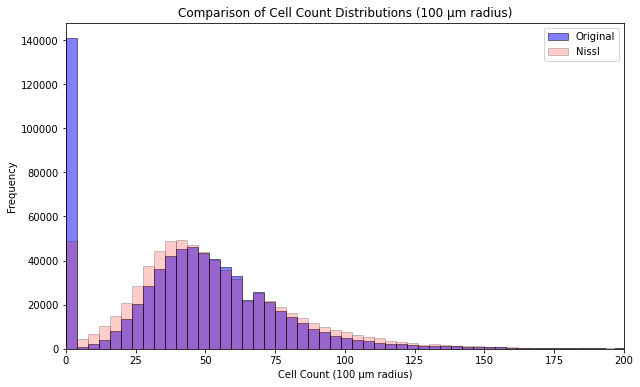

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# 両方のデータセットの最小値と最大値を取得して共通のビン範囲を設定
min_count = min(grid_50um_points_df['cell_count_100um_SCA'].min(), grid_50um_points_df['cell_count_100um_ccf'].min())
max_count = max(grid_50um_points_df['cell_count_100um_SCA'].max(), grid_50um_points_df['cell_count_100um_ccf'].max())

# 共通のビン範囲を作成
bins = np.linspace(min_count, max_count, 100)

# ヒストグラムを重ねてプロット
plt.figure(figsize=(10, 6))

# grid_50um_points_df のヒストグラム
plt.hist(grid_50um_points_df['cell_count_100um_SCA'], bins=bins, alpha=0.5, label='Original', color='blue', edgecolor='black')

# grid_50um_points_df_nissl のヒストグラム
plt.hist(grid_50um_points_df['cell_count_100um_ccf'], bins=bins, alpha=0.2, label='Nissl', color='red', edgecolor='black')

# グラフの設定
plt.xlabel('Cell Count (100 µm radius)')
plt.ylabel('Frequency')
plt.xlim(0, 200)
plt.title('Comparison of Cell Count Distributions (100 µm radius)')
plt.legend()
plt.show()


In [269]:
import tifffile
import numpy as np

# スケール設定と画像サイズの設定
scale = 20
depth_ori = int(np.max(cell_joined['x_section'] * scale)) + 10
height_ori = int(np.max(cell_joined['y_section'] * scale)) + 10
width_ori = int(np.max(cell_joined['z_section'] * scale)) + 10

# 出力ファイル名
img_filename_Nuclear_Isocortex_to_ori = '/export3/Imaging/ds4_Data5/abc_download_root/img_density_cell_count_100um_modified.tif'

# 3D 画像配列の初期化
img_N_ori = np.zeros((height_ori, width_ori, depth_ori), dtype=np.float32)

# 各グリッド点の整数座標を計算し、それに対応する 'cell_count_100um_modified' を取得
x_coords = grid_50um_points_df_modified['x'].astype(int).values
y_coords = grid_50um_points_df_modified['z'].astype(int).values
z_coords = grid_50um_points_df_modified['y'].astype(int).values
counts = grid_50um_points_df_modified['cell_count_100um_modified'].values

# 範囲内のインデックスのみ取得
valid_mask = (
    (0 <= x_coords) & (x_coords < depth_ori) &
    (0 <= y_coords) & (y_coords < height_ori) &
    (0 <= z_coords) & (z_coords < width_ori)
)

# 有効なインデックスに対して値を一度に代入
img_N_ori[y_coords[valid_mask], z_coords[valid_mask],  x_coords[valid_mask]] = counts[valid_mask]
print(np.mean(img_N_ori[img_N_ori>0]))

# TIFF ファイルとして保存
tifffile.imsave(
    img_filename_Nuclear_Isocortex_to_ori,
    img_N_ori
)
print("Nuclear image save done")


60.46799
Nuclear image save done


In [270]:
import tifffile
import numpy as np

# スケール設定と画像サイズの設定
scale = 20
depth_ori = int(np.max(cell_joined['x_section'] * scale)) + 10
height_ori = int(np.max(cell_joined['y_section'] * scale)) + 10
width_ori = int(np.max(cell_joined['z_section'] * scale)) + 10

# 出力ファイル名
img_filename_Nuclear_Isocortex_to_ori = '/export3/Imaging/ds4_Data5/abc_download_root/img_density_cell_count_100um_SCA.tif'

# 3D 画像配列の初期化
img_N_ori = np.zeros((height_ori, width_ori, depth_ori), dtype=np.float32)

# 各グリッド点の整数座標を計算し、それに対応する 'cell_count_100um_modified' を取得
x_coords = grid_50um_points_df_modified['x'].astype(int).values
y_coords = grid_50um_points_df_modified['z'].astype(int).values
z_coords = grid_50um_points_df_modified['y'].astype(int).values
counts = grid_50um_points_df_modified['cell_count_100um_SCA'].values

# 範囲内のインデックスのみ取得
valid_mask = (
    (0 <= x_coords) & (x_coords < depth_ori) &
    (0 <= y_coords) & (y_coords < height_ori) &
    (0 <= z_coords) & (z_coords < width_ori)
)

# 有効なインデックスに対して値を一度に代入
img_N_ori[y_coords[valid_mask], z_coords[valid_mask],  x_coords[valid_mask]] = counts[valid_mask]
print(np.mean(img_N_ori[img_N_ori>0]))

# TIFF ファイルとして保存
tifffile.imsave(
    img_filename_Nuclear_Isocortex_to_ori,
    img_N_ori
)
print("Nuclear image save done")


55.029896
Nuclear image save done


In [168]:
import tifffile
import numpy as np

# スケール設定と画像サイズの設定
scale = 20
depth_ori = int(np.max(cell_joined['x_section'] * scale)) + 10
height_ori = int(np.max(cell_joined['y_section'] * scale)) + 10
width_ori = int(np.max(cell_joined['z_section'] * scale)) + 10

# 出力ファイル名
img_filename_Nuclear_Isocortex_to_ori = '/export3/Imaging/ds4_Data5/abc_download_root/img_density_cell_count_100um_ccf.tif'

# 3D 画像配列の初期化
img_N_ori = np.zeros((height_ori, width_ori, depth_ori), dtype=np.float32)

# 各グリッド点の整数座標を計算し、それに対応する 'cell_count_100um_modified' を取得
x_coords = grid_50um_points_df['x'].astype(int).values
y_coords = grid_50um_points_df['z'].astype(int).values
z_coords = grid_50um_points_df['y'].astype(int).values
counts = grid_50um_points_df['cell_count_100um_ccf'].values

# 範囲内のインデックスのみ取得
valid_mask = (
    (0 <= x_coords) & (x_coords < depth_ori) &
    (0 <= y_coords) & (y_coords < height_ori) &
    (0 <= z_coords) & (z_coords < width_ori)
)

# 有効なインデックスに対して値を一度に代入
img_N_ori[y_coords[valid_mask], z_coords[valid_mask],  x_coords[valid_mask]] = counts[valid_mask]
print(np.mean(img_N_ori[img_N_ori>0]))

# TIFF ファイルとして保存
tifffile.imsave(
    img_filename_Nuclear_Isocortex_to_ori,
    img_N_ori
)
print("Nuclear image save done")


54.39236
Nuclear image save done


In [96]:
import tifffile
import numpy as np

# スケール設定と画像サイズの設定
scale = 20
depth_ori = int(np.max(cell_joined['x_section'] * scale)) + 10
height_ori = int(np.max(cell_joined['y_section'] * scale)) + 10
width_ori = int(np.max(cell_joined['z_section'] * scale)) + 10

# 出力ファイル名
img_filename_Nuclear_Isocortex_to_ori = '/export3/Imaging/ds4_Data5/abc_download_root/img_density_test_cell_count_100um_modified_nissl.tif'

# 3D 画像配列の初期化
img_N_ori = np.zeros((height_ori, width_ori, depth_ori), dtype=np.float32)

# 各グリッド点の整数座標を計算し、それに対応する 'cell_count_100um_modified' を取得
x_coords = grid_50um_points_df_nissl['x'].astype(int).values
y_coords = grid_50um_points_df_nissl['z'].astype(int).values
z_coords = grid_50um_points_df_nissl['y'].astype(int).values
counts =grid_50um_points_df_nissl['cell_count_100um_modified'].values

# 範囲内のインデックスのみ取得
valid_mask = (
    (0 <= x_coords) & (x_coords < depth_ori) &
    (0 <= y_coords) & (y_coords < height_ori) &
    (0 <= z_coords) & (z_coords < width_ori)
)

# 有効なインデックスに対して値を一度に代入
img_N_ori[y_coords[valid_mask], z_coords[valid_mask],  x_coords[valid_mask]] = counts[valid_mask]
print(np.mean(img_N_ori[img_N_ori>0]))

# TIFF ファイルとして保存
tifffile.imsave(
    img_filename_Nuclear_Isocortex_to_ori,
    img_N_ori
)
print("Nuclear image save done")


60.69756
Nuclear image save done


In [97]:
import tifffile
import numpy as np

# スケール設定と画像サイズの設定
scale = 20
depth_ori = int(np.max(cell_joined['x_section'] * scale)) + 10
height_ori = int(np.max(cell_joined['y_section'] * scale)) + 10
width_ori = int(np.max(cell_joined['z_section'] * scale)) + 10

# 出力ファイル名
img_filename_Nuclear_Isocortex_to_ori = '/export3/Imaging/ds4_Data5/abc_download_root/img_density_test_cell_count_100um_SCA_nissl.tif'

# 3D 画像配列の初期化
img_N_ori = np.zeros((height_ori, width_ori, depth_ori), dtype=np.float32)

# 各グリッド点の整数座標を計算し、それに対応する 'cell_count_100um_modified' を取得
x_coords = grid_50um_points_df_nissl['x'].astype(int).values
y_coords = grid_50um_points_df_nissl['z'].astype(int).values
z_coords = grid_50um_points_df_nissl['y'].astype(int).values
counts =grid_50um_points_df_nissl['cell_count_100um_SCA'].values

# 範囲内のインデックスのみ取得
valid_mask = (
    (0 <= x_coords) & (x_coords < depth_ori) &
    (0 <= y_coords) & (y_coords < height_ori) &
    (0 <= z_coords) & (z_coords < width_ori)
)

# 有効なインデックスに対して値を一度に代入
img_N_ori[y_coords[valid_mask], z_coords[valid_mask],  x_coords[valid_mask]] = counts[valid_mask]
print(np.mean(img_N_ori[img_N_ori>0]))

# TIFF ファイルとして保存
tifffile.imsave(
    img_filename_Nuclear_Isocortex_to_ori,
    img_N_ori
)
print("Nuclear image save done")


53.431664
Nuclear image save done


In [98]:
img_N_ori.shape

(195, 294, 222)

In [271]:
import numpy as np
import tifffile
from scipy.ndimage import uniform_filter

# TIFFファイルの読み込み
image_I = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/img_density_cell_count_100um_modified.tif')
image_J = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/img_density_cell_count_100um_SCA.tif')

# パラメータ設定
radius = 2  # ウィンドウ半径 (ボクセル単位)
window_size = 2 * radius + 1

# 結果を格納するための3D配列 (195, 294, 222 の形状)
ncc_map_3d = np.zeros_like(image_I, dtype=np.float32)

# 各yスライスでのNCCを計算
for y_plane in range(image_I.shape[1]):
    # 各スライスは (222, 195) の平面として取り出す
    I_slice = image_I[:, y_plane, :]
    J_slice = image_J[:, y_plane, :]
    
    # スライスが完全にゼロでない場合にのみ処理
    if np.any(I_slice) and np.any(J_slice):
        # 平均フィルターを使用してローカル平均を計算
        mean_I = uniform_filter(I_slice, size=window_size)
        mean_J = uniform_filter(J_slice, size=window_size)

        # ローカル平均を引いた差を計算
        normed_I = I_slice - mean_I
        normed_J = J_slice - mean_J

        # ローカルエネルギー (平方ノルム) の計算
        norm_I = uniform_filter(normed_I**2, size=window_size)
        norm_J = uniform_filter(normed_J**2, size=window_size)

        # 分子と分母の計算
        numerator = uniform_filter(normed_I * normed_J, size=window_size)
        denominator = np.sqrt(norm_I * norm_J)

        # ゼロ除算を防止しつつNCCを計算
        ncc_map_3d[:, y_plane, :] = np.divide(numerator, denominator, out=np.zeros_like(numerator), where=(denominator != 0))

# 3DのNCCマップを保存
tifffile.imwrite('/export3/Imaging/ds4_Data5/abc_download_root/ncc_map_3d_corrected.tif', ncc_map_3d)
print("3D NCC map calculated and saved with correct dimensions.")
#np.mean(ncc_map_3d[ncc_map_3d>0])
len(ncc_map_3d[(ncc_map_3d>0) & (ncc_map_3d<0.01)])

3D NCC map calculated and saved with correct dimensions.


38

In [272]:
import numpy as np
import tifffile
from scipy.ndimage import uniform_filter

# TIFFファイルの読み込み
image_I = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/img_density_cell_count_100um_modified.tif')
image_J = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/img_density_cell_count_100um_ccf.tif')

# パラメータ設定
radius = 2  # ウィンドウ半径 (ボクセル単位)
window_size = 2 * radius + 1

# 結果を格納するための3D配列 (195, 294, 222 の形状)
ncc_map_3d = np.zeros_like(image_I, dtype=np.float32)

# 各yスライスでのNCCを計算
for y_plane in range(image_I.shape[1]):
    # 各スライスは (222, 195) の平面として取り出す
    I_slice = image_I[:, y_plane, :]
    J_slice = image_J[:, y_plane, :]
    
    # スライスが完全にゼロでない場合にのみ処理
    if np.any(I_slice) and np.any(J_slice):
        # 平均フィルターを使用してローカル平均を計算
        mean_I = uniform_filter(I_slice, size=window_size)
        mean_J = uniform_filter(J_slice, size=window_size)

        # ローカル平均を引いた差を計算
        normed_I = I_slice - mean_I
        normed_J = J_slice - mean_J

        # ローカルエネルギー (平方ノルム) の計算
        norm_I = uniform_filter(normed_I**2, size=window_size)
        norm_J = uniform_filter(normed_J**2, size=window_size)

        # 分子と分母の計算
        numerator = uniform_filter(normed_I * normed_J, size=window_size)
        denominator = np.sqrt(norm_I * norm_J)

        # ゼロ除算を防止しつつNCCを計算
        ncc_map_3d[:, y_plane, :] = np.divide(numerator, denominator, out=np.zeros_like(numerator), where=(denominator != 0))

# 3DのNCCマップを保存
tifffile.imwrite('/export3/Imaging/ds4_Data5/abc_download_root/ncc_map_3d_corrected_ccf.tif', ncc_map_3d)
print("3D NCC map calculated and saved with correct dimensions.")
#np.mean(ncc_map_3d[ncc_map_3d>0])
len(ncc_map_3d[(ncc_map_3d>0) & (ncc_map_3d<0.01)])

3D NCC map calculated and saved with correct dimensions.


4737

In [123]:
import numpy as np
import tifffile
from scipy.ndimage import uniform_filter

# TIFFファイルの読み込み
image_I = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/img_density_test_cell_count_100um_modified_nissl.tif')
image_J = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/img_density_test_cell_count_100um_SCA_nissl.tif')

# パラメータ設定
radius = 2  # ウィンドウ半径 (ボクセル単位)
window_size = 2 * radius + 1

# 結果を格納するための3D配列 (195, 294, 222 の形状)
ncc_map_3d = np.zeros_like(image_I, dtype=np.float32)

# 各yスライスでのNCCを計算
for y_plane in range(image_I.shape[1]):
    # 各スライスは (222, 195) の平面として取り出す
    I_slice = image_I[:, y_plane, :]
    J_slice = image_J[:, y_plane, :]
    
    # スライスが完全にゼロでない場合にのみ処理
    if np.any(I_slice) and np.any(J_slice):
        # 平均フィルターを使用してローカル平均を計算
        mean_I = uniform_filter(I_slice, size=window_size)
        mean_J = uniform_filter(J_slice, size=window_size)

        # ローカル平均を引いた差を計算
        normed_I = I_slice - mean_I
        normed_J = J_slice - mean_J

        # ローカルエネルギー (平方ノルム) の計算
        norm_I = uniform_filter(normed_I**2, size=window_size)
        norm_J = uniform_filter(normed_J**2, size=window_size)

        # 分子と分母の計算
        numerator = uniform_filter(normed_I * normed_J, size=window_size)
        denominator = np.sqrt(norm_I * norm_J)

        # ゼロ除算を防止しつつNCCを計算
        ncc_map_3d[:, y_plane, :] = np.divide(numerator, denominator, out=np.zeros_like(numerator), where=(denominator != 0))

# 3DのNCCマップを保存
tifffile.imwrite('/export3/Imaging/ds4_Data5/abc_download_root/ncc_map_3d_corrected_nissl.tif', ncc_map_3d)
print("3D NCC map calculated and saved with correct dimensions.")
len(ncc_map_3d[(ncc_map_3d>0) & (ncc_map_3d<0.01)])

3D NCC map calculated and saved with correct dimensions.


37

In [182]:
ncc_map_3d_corrected.shape

(195, 294, 222)

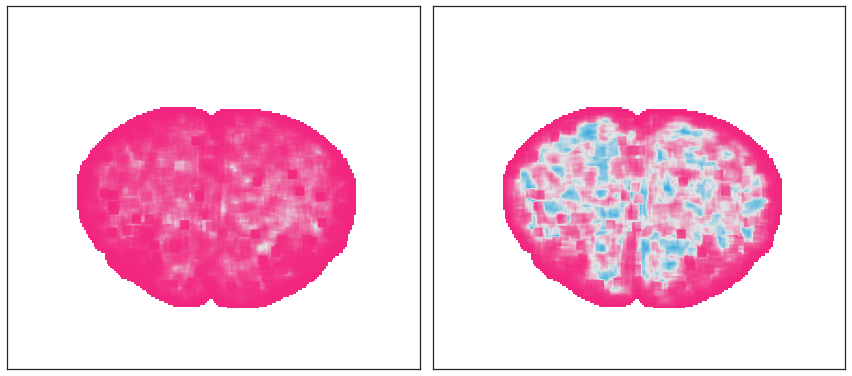

In [652]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors

# cell_joinedデータのフィルタリング（C57BL6J-638850.58のみ）
filtered_data = cell_joined[cell_joined['brain_section_label'] == 'C57BL6J-638850.57']

# y_SyNedからy位置を取得し、その位置に対応するスライスを選択
y_value = filtered_data['y_SyNed'].iloc[0]  # y_SyNed の値を取得 (10umスケール)
slice_index_ncc = int(y_value)  # ncc_map_3d_corrected用のスライス (50umスケール)

# NCCマップの読み込み
ncc_map_3d_corrected = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/ncc_map_3d_corrected.tif')
ncc_map_3d_corrected_nissl = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/ncc_map_3d_corrected_ccf.tif')

# shape確認 (195, 294, 222)であることを前提
assert ncc_map_3d_corrected.shape == (195, 294, 222)
assert ncc_map_3d_corrected_nissl.shape == (195, 294, 222)

# 50umスケールなので、ncc_map_3d_correctedからy座標に該当するスライスを抽出
ncc_slice = ncc_map_3d_corrected[:, slice_index_ncc, :]  # y軸に沿ったスライス (50umスケール)
nissl_slice = ncc_map_3d_corrected_nissl[:, slice_index_ncc, :]  # y軸に沿ったNisslスライス (50umスケール)

# 値が0の部分をマスク
ncc_slice_masked = np.ma.masked_where(ncc_slice == 0, ncc_slice)
nissl_slice_masked = np.ma.masked_where(nissl_slice == 0, nissl_slice)

def create_custom_cmap():
    colors = [(0.0, 154/255, 222/255), (0.9, 0.9, 0.9), (0.95, 0.15, 0.5)] 
    cmap_name = "custom_cmap"
    return mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

cmap = create_custom_cmap()

# カラー注釈画像とNCCマップデータを重ねてプロット
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 左側: NCC corrected スライス (50umスケール)
im1 = axes[0].imshow(ncc_slice_masked, cmap=cmap, extent=[0, 222, 0, 195], vmin=-1, vmax=1, alpha=1)
axes[0].invert_yaxis()
axes[0].set_xticks([])
axes[0].set_yticks([])

# 右側: NCC Nissl スライス (50umスケール)
im2 = axes[1].imshow(nissl_slice_masked, cmap=cmap, extent=[0, 222, 0, 195], vmin=-1, vmax=1, alpha=1)
axes[1].invert_yaxis()
axes[1].set_xticks([])
axes[1].set_yticks([])
# 全体のプロット調整
for ax in axes:
    ax.set_xlim(0, 222)
    ax.set_ylim(0, 195)
    ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig(f"/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.2/NCC_slice_57_density_consistency_on_Affined_space.pdf",
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


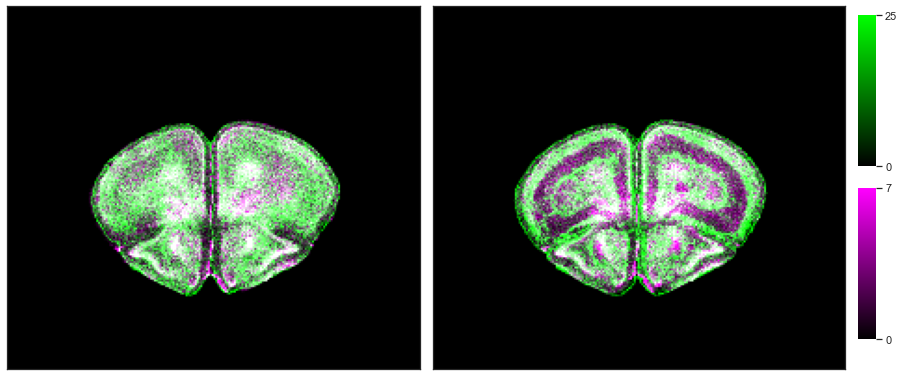

In [682]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import matplotlib.colors as mcolors
from matplotlib import cm

# cell_joinedデータのフィルタリング（C57BL6J-638850.58のみ）
filtered_data = cell_joined[cell_joined['brain_section_label'] == 'C57BL6J-638850.57']

# y_SyNedからy位置を取得し、その位置に対応するスライスを選択
y_value = filtered_data['y_SyNed'].iloc[0]  # y_SyNed の値を取得 (10umスケール)
slice_index_ncc = int(y_value)  # ncc_map_3d_corrected用のスライス (50umスケール)

# NCCマップの読み込み
ncc_map_3d_corrected = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/img_density_50um_SCA_Affined.tif')
ncc_map_3d_corrected_nissl = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/img_density_50um_SyN_Affined.tif')
ncc_map_3d_corrected_nissl2 = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/img_density_50um_CCF_Affined.tif')

# 50umスケールなので、ncc_map_3d_correctedからy座標に該当するスライスを抽出
ncc_slice = ncc_map_3d_corrected[:, slice_index_ncc, :]  # y軸に沿ったスライス (50umスケール)
nissl_slice = ncc_map_3d_corrected_nissl[:, slice_index_ncc, :]  # y軸に沿ったNisslスライス (50umスケール)
nissl_slice2 = ncc_map_3d_corrected_nissl2[:, slice_index_ncc, :]  # y軸に沿ったccfスライス (50umスケール)

# 値が0の部分をマスク
ncc_slice_masked = np.ma.masked_where(ncc_slice == 0, ncc_slice)
nissl_slice_masked = np.ma.masked_where(nissl_slice == 0, nissl_slice)
nissl_slice_masked2 = np.ma.masked_where(nissl_slice2 == 0, nissl_slice2)

# カラーマップの範囲を指定する関数
def plot_image_with_range(ax, image, vmin, vmax):
    im = ax.imshow(image, extent=[0, 222, 0, 195], vmin=vmin, vmax=vmax)
    ax.invert_yaxis()
    ax.set_xticks([])
    ax.set_yticks([])
    return im

# カラーを定義（マゼンタと緑の合成を行うための方法）
def merge_images(slice1, slice2, color1, color2, vmin1=0, vmax1=1, vmin2=0, vmax2=1):
    # slice1 と slice2 を正規化して、カラーに適用
    norm_slice1 = (slice1 - vmin1) / (vmax1 - vmin1)
    norm_slice2 = (slice2 - vmin2) / (vmax2 - vmin2)
    
    # マゼンタと緑の強度に基づいて合成
    merged = np.zeros((slice1.shape[0], slice1.shape[1], 3), dtype=np.float32)
    merged[..., 0] = norm_slice1 * color1[0]  # R (マゼンタの赤成分)
    merged[..., 1] = norm_slice2 * color2[1]  # G (緑の緑成分)
    merged[..., 2] = norm_slice1 * color1[2]  # B (マゼンタの青成分)
    
    # 値を0から1の範囲にクリップ
    merged = np.clip(merged, 0, 1)
    
    return merged

# マゼンタ (Magenta) と 緑 (Green) の色を定義
magenta = np.array([1.0, 0.0, 1.0])
green = np.array([0.0, 1.0, 0.0])

# 左側: img_density_50um_SCA_Affined.tif + ncc_map_3d_corrected.tif
# スライスごとの範囲を指定して正規化した合成を実施
vmin_ncc = 0
vmax_ncc = 25
vmin_nissl = 0
vmax_nissl = 7
merged_img_density_ncc = merge_images(ncc_slice_masked, nissl_slice_masked, magenta, green, vmin_ncc, vmax_ncc, vmin_nissl, vmax_nissl)

# 右側: img_density_50um_SCA_Affined.tif + ncc_map_3d_corrected_ccf.tif
vmin_nissl2 = 0
vmax_nissl2 = 7
merged_img_density_ncc2 = merge_images(ncc_slice_masked, nissl_slice_masked2, magenta, green, vmin_ncc, vmax_ncc, vmin_nissl2, vmax_nissl2)

# 合成画像をプロット
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 左側: img_density_50um_SCA_Affined.tif + ncc_map_3d_corrected.tif
im1 = plot_image_with_range(axes[0], merged_img_density_ncc, vmin_ncc, vmax_ncc)

# 右側: img_density_50um_SCA_Affined.tif + ncc_map_3d_corrected_ccf.tif
im2 = plot_image_with_range(axes[1], merged_img_density_ncc2, vmin_nissl2, vmax_nissl2)

# 全体のプロット調整
for ax in axes:
    ax.set_xlim(0, 222)
    ax.set_ylim(0, 195)
    ax.set_aspect('equal', adjustable='box')

plt.tight_layout()

# カラーバーの作成：緑とマゼンタそれぞれ独立したカラーバーを作成する
green_cmap = mcolors.LinearSegmentedColormap.from_list("green_only", ["black", green])
magenta_cmap = mcolors.LinearSegmentedColormap.from_list("magenta_only", ["black", magenta])

# 緑のカラーバーの追加
cbar_ax1 = fig.add_axes([1.00, 0.55, 0.02, 0.35])  # 緑のカラーバーの位置を調整
green_cbar = fig.colorbar(cm.ScalarMappable(cmap=green_cmap, norm=plt.Normalize(vmin_ncc, vmax_ncc)), cax=cbar_ax1)
green_cbar.set_ticks([vmin_ncc, vmax_ncc])
green_cbar.outline.set_visible(False)  # 枠線を消す

# マゼンタのカラーバーの追加
cbar_ax2 = fig.add_axes([1.00, 0.15, 0.02, 0.35])  # マゼンタのカラーバーの位置を調整
magenta_cbar = fig.colorbar(cm.ScalarMappable(cmap=magenta_cmap, norm=plt.Normalize(vmin_nissl, vmax_nissl)), cax=cbar_ax2)
magenta_cbar.set_ticks([vmin_nissl, vmax_nissl])
magenta_cbar.outline.set_visible(False)  # 枠線を消す

plt.tight_layout()
plt.savefig(f"/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.2/Cell_Density_image_57_SCA_and_CCF_on_Affined_space.pdf",
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


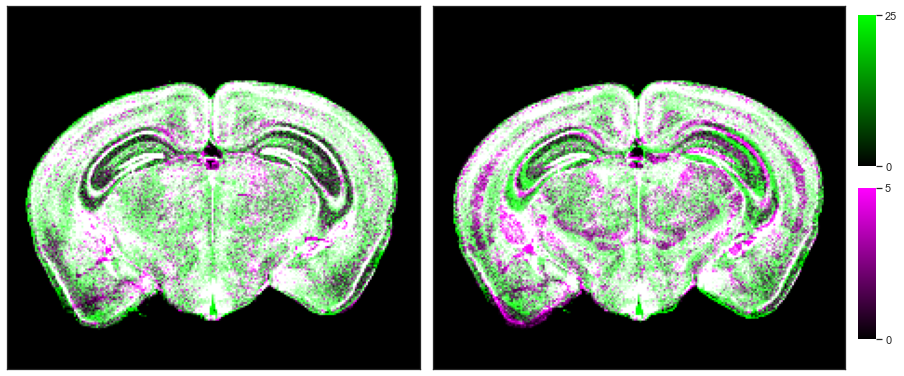

In [683]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import matplotlib.colors as mcolors
from matplotlib import cm

# cell_joinedデータのフィルタリング（C57BL6J-638850.58のみ）
filtered_data = cell_joined[cell_joined['brain_section_label'] == 'C57BL6J-638850.36']

# y_SyNedからy位置を取得し、その位置に対応するスライスを選択
y_value = filtered_data['y_SyNed'].iloc[0]  # y_SyNed の値を取得 (10umスケール)
slice_index_ncc = int(y_value)  # ncc_map_3d_corrected用のスライス (50umスケール)

# NCCマップの読み込み
ncc_map_3d_corrected = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/img_density_50um_SCA_Affined.tif')
ncc_map_3d_corrected_nissl = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/img_density_50um_SyN_Affined.tif')
ncc_map_3d_corrected_nissl2 = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/img_density_50um_CCF_Affined.tif')

# 50umスケールなので、ncc_map_3d_correctedからy座標に該当するスライスを抽出
ncc_slice = ncc_map_3d_corrected[:, slice_index_ncc, :]  # y軸に沿ったスライス (50umスケール)
nissl_slice = ncc_map_3d_corrected_nissl[:, slice_index_ncc, :]  # y軸に沿ったNisslスライス (50umスケール)
nissl_slice2 = ncc_map_3d_corrected_nissl2[:, slice_index_ncc, :]  # y軸に沿ったccfスライス (50umスケール)

# 値が0の部分をマスク
ncc_slice_masked = np.ma.masked_where(ncc_slice == 0, ncc_slice)
nissl_slice_masked = np.ma.masked_where(nissl_slice == 0, nissl_slice)
nissl_slice_masked2 = np.ma.masked_where(nissl_slice2 == 0, nissl_slice2)

# カラーマップの範囲を指定する関数
def plot_image_with_range(ax, image, vmin, vmax):
    im = ax.imshow(image, extent=[0, 222, 0, 195], vmin=vmin, vmax=vmax)
    ax.invert_yaxis()
    ax.set_xticks([])
    ax.set_yticks([])
    return im

# カラーを定義（マゼンタと緑の合成を行うための方法）
def merge_images(slice1, slice2, color1, color2, vmin1=0, vmax1=1, vmin2=0, vmax2=1):
    # slice1 と slice2 を正規化して、カラーに適用
    norm_slice1 = (slice1 - vmin1) / (vmax1 - vmin1)
    norm_slice2 = (slice2 - vmin2) / (vmax2 - vmin2)
    
    # マゼンタと緑の強度に基づいて合成
    merged = np.zeros((slice1.shape[0], slice1.shape[1], 3), dtype=np.float32)
    merged[..., 0] = norm_slice1 * color1[0]  # R (マゼンタの赤成分)
    merged[..., 1] = norm_slice2 * color2[1]  # G (緑の緑成分)
    merged[..., 2] = norm_slice1 * color1[2]  # B (マゼンタの青成分)
    
    # 値を0から1の範囲にクリップ
    merged = np.clip(merged, 0, 1)
    
    return merged

# マゼンタ (Magenta) と 緑 (Green) の色を定義
magenta = np.array([1.0, 0.0, 1.0])
green = np.array([0.0, 1.0, 0.0])

# 左側: img_density_50um_SCA_Affined.tif + ncc_map_3d_corrected.tif
# スライスごとの範囲を指定して正規化した合成を実施
vmin_ncc = 0
vmax_ncc = 25
vmin_nissl = 0
vmax_nissl = 5
merged_img_density_ncc = merge_images(ncc_slice_masked, nissl_slice_masked, magenta, green, vmin_ncc, vmax_ncc, vmin_nissl, vmax_nissl)

# 右側: img_density_50um_SCA_Affined.tif + ncc_map_3d_corrected_ccf.tif
vmin_nissl2 = 0
vmax_nissl2 =5
merged_img_density_ncc2 = merge_images(ncc_slice_masked, nissl_slice_masked2, magenta, green, vmin_ncc, vmax_ncc, vmin_nissl2, vmax_nissl2)

# 合成画像をプロット
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 左側: img_density_50um_SCA_Affined.tif + ncc_map_3d_corrected.tif
im1 = plot_image_with_range(axes[0], merged_img_density_ncc, vmin_ncc, vmax_ncc)

# 右側: img_density_50um_SCA_Affined.tif + ncc_map_3d_corrected_ccf.tif
im2 = plot_image_with_range(axes[1], merged_img_density_ncc2, vmin_nissl2, vmax_nissl2)

# 全体のプロット調整
for ax in axes:
    ax.set_xlim(0, 222)
    ax.set_ylim(0, 195)
    ax.set_aspect('equal', adjustable='box')

plt.tight_layout()

# カラーバーの作成：緑とマゼンタそれぞれ独立したカラーバーを作成する
green_cmap = mcolors.LinearSegmentedColormap.from_list("green_only", ["black", green])
magenta_cmap = mcolors.LinearSegmentedColormap.from_list("magenta_only", ["black", magenta])

# 緑のカラーバーの追加
cbar_ax1 = fig.add_axes([1.00, 0.55, 0.02, 0.35])  # 緑のカラーバーの位置を調整
green_cbar = fig.colorbar(cm.ScalarMappable(cmap=green_cmap, norm=plt.Normalize(vmin_ncc, vmax_ncc)), cax=cbar_ax1)
green_cbar.set_ticks([vmin_ncc, vmax_ncc])
green_cbar.outline.set_visible(False)  # 枠線を消す

# マゼンタのカラーバーの追加
cbar_ax2 = fig.add_axes([1.00, 0.15, 0.02, 0.35])  # マゼンタのカラーバーの位置を調整
magenta_cbar = fig.colorbar(cm.ScalarMappable(cmap=magenta_cmap, norm=plt.Normalize(vmin_nissl, vmax_nissl)), cax=cbar_ax2)
magenta_cbar.set_ticks([vmin_nissl, vmax_nissl])
magenta_cbar.outline.set_visible(False)  # 枠線を消す

plt.tight_layout()
plt.savefig(f"/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.2/Cell_Density_image_36_SCA_and_CCF_on_Affined_space.pdf",
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


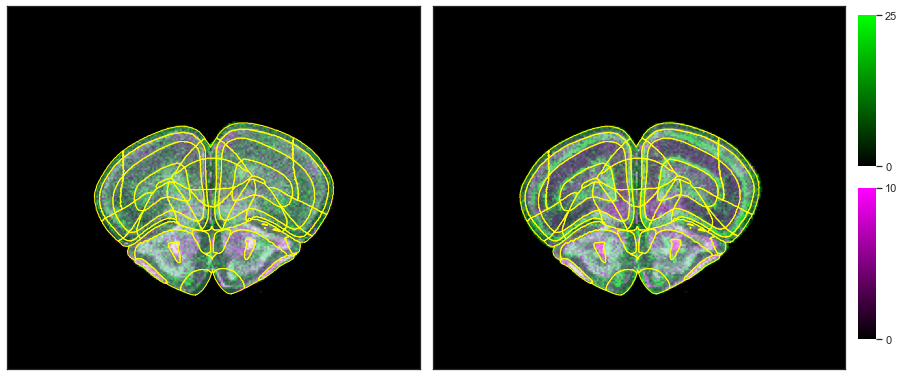

In [684]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import matplotlib.colors as mcolors
from skimage import measure
from matplotlib import cm

# cell_joinedデータのフィルタリング（C57BL6J-638850.58のみ）
filtered_data = cell_joined[cell_joined['brain_section_label'] == 'C57BL6J-638850.58']

# y_SyNedからy位置を取得し、その位置に対応するスライスを選択
y_value = filtered_data['y_SyNed'].iloc[0]  # y_SyNed の値を取得 (10umスケール)
slice_index_ncc = int(y_value)  # ncc_map_3d_corrected用のスライス (50umスケール)

# NCCマップの読み込み
ncc_map_3d_corrected = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/img_density_50um_SCA_Affined.tif')
ncc_map_3d_corrected_nissl = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/img_density_50um_SyN_Affined.tif')
ncc_map_3d_corrected_nissl2 = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/img_density_50um_CCF_Affined.tif')

# annotation_10_Affinedデータの読み込み (仮に準備されているとする)
# annotation_10_Affined = ...

# annotation_10_Affinedが10umスケールなので、スライスインデックスを5倍して50umスケールに合わせる
slice_index_annotation = int(y_value * 5)  # 10umスケール -> 50umスケールに対応

# 50umスケールなので、ncc_map_3d_correctedからy座標に該当するスライスを抽出
ncc_slice = ncc_map_3d_corrected[:, slice_index_ncc, :]  # y軸に沿ったスライス (50umスケール)
nissl_slice = ncc_map_3d_corrected_nissl[:, slice_index_ncc, :]  # y軸に沿ったNisslスライス (50umスケール)
nissl_slice2 = ncc_map_3d_corrected_nissl2[:, slice_index_ncc, :]  # y軸に沿ったccfスライス (50umスケール)

# annotationスライスの取得（境界線を引くため、50umスケールに対応）
annotation_slice = annotation_10_Affined[:, slice_index_annotation, :]

# RGB画像の初期化 (RGBA: R, G, B, Alpha)
color_image = np.zeros((*annotation_slice.shape, 4), dtype=np.uint8)

# 各IDに対応するRGBでカラー画像を作成（ゼロIDは透明）
for unique_id in np.unique(annotation_slice):
    if unique_id == 0:
        continue
    if unique_id in id_to_rgb:  # RGBの辞書で対応するIDを探す
        r, g, b = id_to_rgb[unique_id]
        color_image[annotation_slice == unique_id] = [r, g, b, 255]  # 透明度100%

# 各IDに対して輪郭を検出して黄色で描画
# 各IDに対して輪郭を検出して黄色で描画
def add_yellow_boundaries(ax, annotation_slice, scale_factor=5):
    for unique_id in np.unique(annotation_slice):
        if unique_id == 0:
            continue
        # 領域の境界を取得して可視化
        contours = measure.find_contours(annotation_slice == unique_id, 0.5)  # 領域の境界を取得
        if not contours:
            print(f"No contours found for ID {unique_id}")  # デバッグ用に出力
        for contour in contours:
            # Scale the contour coordinates to match the extent (annotation is at 10um, images at 50um)
            contour[:, 0] *= scale_factor  # Y-coordinate scaling
            contour[:, 1] *= scale_factor  # X-coordinate scaling
            
            # Flip the y-axis of the contours to match the flipped images
            contour[:, 0] = annotation_slice.shape[0] * scale_factor - contour[:, 0]
            
            ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color='yellow')  # 輪郭をプロット

# Adjust the rest of the code as needed

# 値が0の部分をマスク
ncc_slice_masked = np.ma.masked_where(ncc_slice == 0, ncc_slice)
nissl_slice_masked = np.ma.masked_where(nissl_slice == 0, nissl_slice)
nissl_slice_masked2 = np.ma.masked_where(nissl_slice2 == 0, nissl_slice2)

# カラーマップの範囲を指定する関数
def plot_image_with_range(ax, image, vmin, vmax):
    im = ax.imshow(image, extent=[0, 222, 0, 195], vmin=vmin, vmax=vmax)
    ax.invert_yaxis()
    ax.set_xticks([])
    ax.set_yticks([])
    return im

# カラーを定義（マゼンタと緑の合成を行うための方法）
def merge_images(slice1, slice2, color1, color2, vmin1=0, vmax1=1, vmin2=0, vmax2=1):
    # slice1 と slice2 を正規化して、カラーに適用
    norm_slice1 = (slice1 - vmin1) / (vmax1 - vmin1)
    norm_slice2 = (slice2 - vmin2) / (vmax2 - vmin2)
    
    # マゼンタと緑の強度に基づいて合成
    merged = np.zeros((slice1.shape[0], slice1.shape[1], 3), dtype=np.float32)
    merged[..., 0] = norm_slice1 * color1[0]  # R (マゼンタの赤成分)
    merged[..., 1] = norm_slice2 * color2[1]  # G (緑の緑成分)
    merged[..., 2] = norm_slice1 * color1[2]  # B (マゼンタの青成分)
    
    # 値を0から1の範囲にクリップ
    merged = np.clip(merged, 0, 1)
    
    return merged

# マゼンタ (Magenta) と 緑 (Green) の色を定義
magenta = np.array([1.0, 0.0, 1.0])
green = np.array([0.0, 1.0, 0.0])

# 左側: img_density_50um_SCA_Affined.tif + ncc_map_3d_corrected.tif
# スライスごとの範囲を指定して正規化した合成を実施
vmin_ncc = 0
vmax_ncc = 25
vmin_nissl = 0
vmax_nissl = 10
merged_img_density_ncc = merge_images(ncc_slice_masked, nissl_slice_masked, magenta, green, vmin_ncc, vmax_ncc, vmin_nissl, vmax_nissl)

# 右側: img_density_50um_SCA_Affined.tif + ncc_map_3d_corrected_ccf.tif
vmin_nissl2 = 0
vmax_nissl2 = 10
merged_img_density_ncc2 = merge_images(ncc_slice_masked, nissl_slice_masked2, magenta, green, vmin_ncc, vmax_ncc, vmin_nissl2, vmax_nissl2)

# 合成画像をプロット
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 左側: img_density_50um_SCA_Affined.tif + ncc_map_3d_corrected.tif
im1 = plot_image_with_range(axes[0], merged_img_density_ncc, vmin_ncc, vmax_ncc)
# annotationによるRGBカラー画像と黄色の境界線をプロット (Y軸の反転)
axes[0].imshow(np.flipud(color_image), origin='lower', extent=[0, 222, 0, 195], alpha=0.4)
add_yellow_boundaries(axes[0], annotation_slice, scale_factor=1/5)

# 右側: img_density_50um_SCA_Affined.tif + ncc_map_3d_corrected_ccf.tif
im2 = plot_image_with_range(axes[1], merged_img_density_ncc2, vmin_nissl2, vmax_nissl2)
# annotationによるRGBカラー画像と黄色の境界線をプロット (Y軸の反転)
axes[1].imshow(np.flipud(color_image), origin='lower', extent=[0, 222, 0, 195], alpha=0.4)
add_yellow_boundaries(axes[1], annotation_slice, scale_factor=1/5)

# 全体のプロット調整
for ax in axes:
    ax.set_xlim(0, 222)
    ax.set_ylim(0, 195)
    ax.set_aspect('equal', adjustable='box')

# カラーバーの作成：緑とマゼンタそれぞれ独立したカラーバーを作成する
green_cmap = mcolors.LinearSegmentedColormap.from_list("green_only", ["black", green])
magenta_cmap = mcolors.LinearSegmentedColormap.from_list("magenta_only", ["black", magenta])

# 緑のカラーバーの追加
cbar_ax1 = fig.add_axes([1.00, 0.55, 0.02, 0.35])  # 緑のカラーバーの位置を調整
green_cbar = fig.colorbar(cm.ScalarMappable(cmap=green_cmap, norm=plt.Normalize(vmin_ncc, vmax_ncc)), cax=cbar_ax1)
green_cbar.set_ticks([vmin_ncc, vmax_ncc])
green_cbar.outline.set_visible(False)  # 枠線を消す

# マゼンタのカラーバーの追加
cbar_ax2 = fig.add_axes([1.00, 0.15, 0.02, 0.35])  # マゼンタのカラーバーの位置を調整
magenta_cbar = fig.colorbar(cm.ScalarMappable(cmap=magenta_cmap, norm=plt.Normalize(vmin_nissl, vmax_nissl)), cax=cbar_ax2)
magenta_cbar.set_ticks([vmin_nissl, vmax_nissl])
magenta_cbar.outline.set_visible(False)  # 枠線を消す

plt.tight_layout()
#plt.savefig(f"/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.2/Cell_Density_image_with_annotation_boundaries_adjusted.pdf",
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()


0.8699098
0.38583276


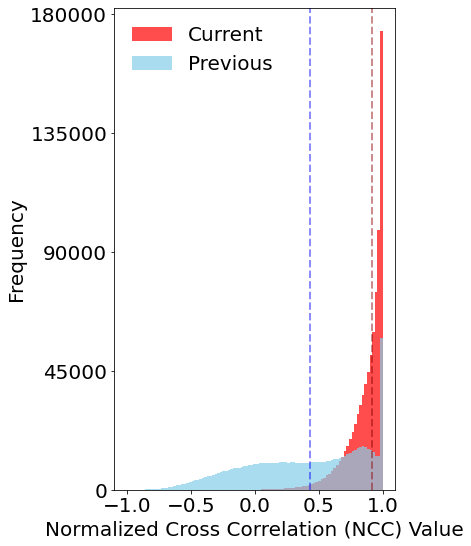

In [313]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt

# NCCマップの読み込み
ncc_map_3d_corrected = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/ncc_map_3d_corrected.tif')
ncc_map_3d_corrected_nissl = tifffile.imread('/export3/Imaging/ds4_Data5/abc_download_root/ncc_map_3d_corrected_ccf.tif')

# 非ゼロ値のみ抽出
ncc_values_corrected = ncc_map_3d_corrected[ncc_map_3d_corrected != 0]
ncc_values_corrected_nissl = ncc_map_3d_corrected_nissl[ncc_map_3d_corrected_nissl != 0]

print(np.mean(ncc_values_corrected))
print(np.mean(ncc_values_corrected_nissl))

# 各データセットの中央値を計算
median_corrected = np.median(ncc_values_corrected)
median_nissl = np.median(ncc_values_corrected_nissl)

# 共通のビン範囲を設定
min_value = min(ncc_values_corrected.min(), ncc_values_corrected_nissl.min())
max_value = max(ncc_values_corrected.max(), ncc_values_corrected_nissl.max())
bins = np.linspace(-1, 1, 100)

# ヒストグラムを重ねてプロット
plt.figure(figsize=(6, 8))

# ncc_map_3d_corrected のヒストグラム
plt.hist(ncc_values_corrected, bins=bins, alpha=0.7, label='Current', color='red')

# ncc_map_3d_corrected_nissl のヒストグラム
plt.hist(ncc_values_corrected_nissl, bins=bins, alpha=0.7, label='Previous', color='skyblue')

# Medianの縦線を引く
plt.axvline(median_corrected, color='darkred', linestyle='dashed', linewidth=2,  alpha = 0.45)
plt.axvline(median_nissl, color='blue', linestyle='dashed', linewidth=2,  alpha = 0.45)

# グラフの設定
plt.xlabel('Normalized Cross Correlation (NCC) Value')
plt.ylabel('Frequency')

# x軸とy軸の目盛りを5つに設定
plt.xticks(np.linspace(-1, 1, 5))  # x軸の目盛り
plt.yticks([0, 45000, 90000, 135000, 180000])  # y軸の目盛り

# 凡例の枠線を消去
plt.legend(frameon=False)

plt.tight_layout()
plt.savefig(f"/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.2/NCC_histogram.pdf",
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


In [280]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U検定を実施
stat, p_value = mannwhitneyu(ncc_values_corrected, ncc_values_corrected_nissl, alternative='two-sided')

# 結果の出力（小さいp値を指数表記で表示）
print("Mann-Whitney U-statistic:", stat)
print("P-value: {:.10e}".format(p_value))  # P値を10桁の指数表記で表示

# 有意差の解釈
alpha = 0.05
if p_value < alpha:
    print("有意差があります（p < 0.05）")
else:
    print("有意差はありません（p >= 0.05）")


Mann-Whitney U-statistic: 564754889482.0
P-value: 0.0000000000e+00
有意差があります（p < 0.05）


In [279]:
p_value

0.0

In [129]:
np.median(ncc_values_corrected_nissl)

0.9198443